In [21]:
# Jupyter Notebook での Auto Reload 設定
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# 必要なライブラリのインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

# matplotlib の設定
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas の設定（必要に応じて）
pd.set_option('display.max_rows', None)  # 全行表示
pd.set_option('display.max_columns', None)  # 全列表示
pd.set_option('display.width', None)  # 表示幅の制限解除
# 警告を無視
import warnings
warnings.filterwarnings('ignore')

# scikit-learn の iris データセットをロード
from sklearn.datasets import load_iris

# 1. `iris` データセットをロード
iris = load_iris()

# 2. pandas の DataFrame に変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. 最初の5行を表示
df.head(20) 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
# 変数間の相関係数を計算
correlation_matrix = df.corr()

# 相関係数行列を表示
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


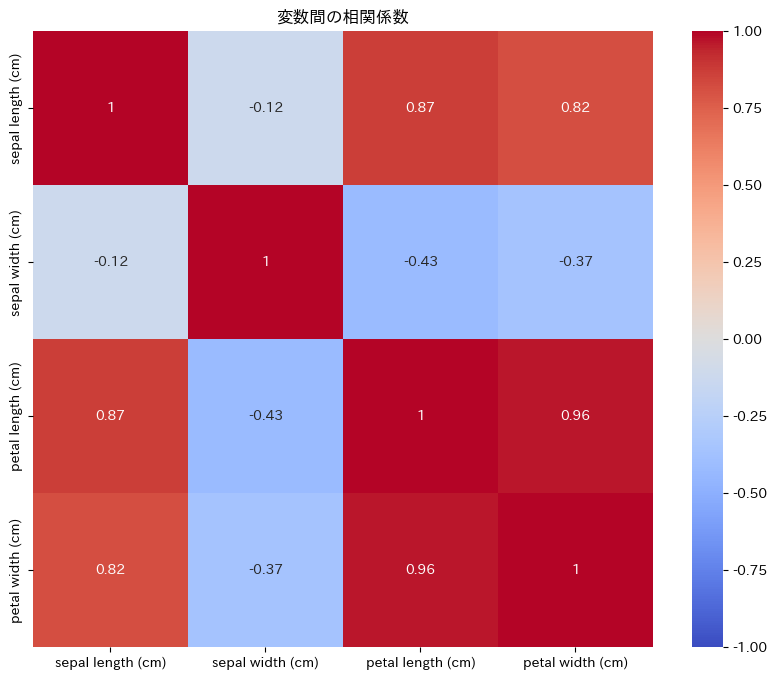

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 変数間の相関係数を計算
correlation_matrix = df.corr()
# ヒートマップで相関係数を可視化
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('変数間の相関係数')
plt.show()

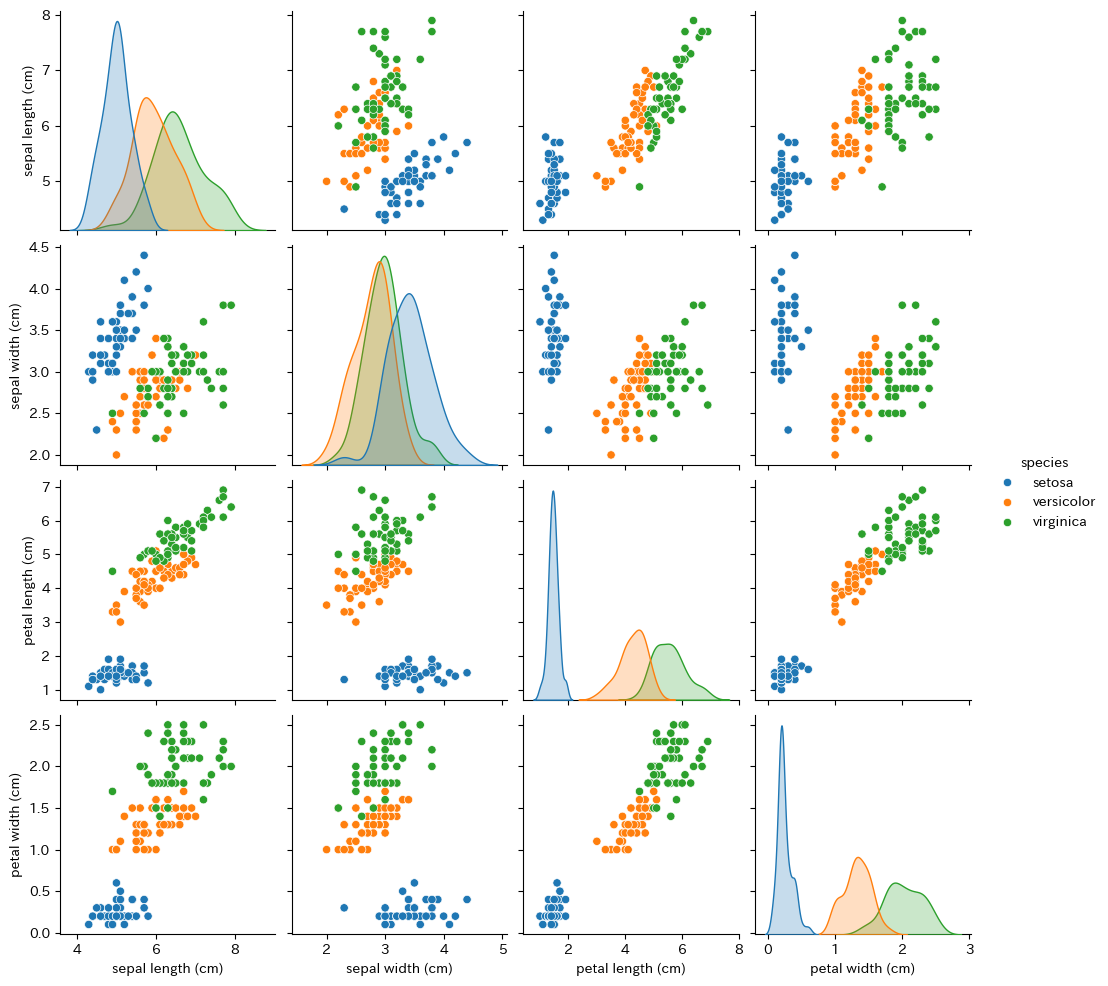

In [7]:
# 必要なライブラリをインポート
import seaborn as sns
import matplotlib.pyplot as plt

# ターゲット（品種）の列を追加
df['species'] = iris.target_names[iris.target]

# ペアプロットを作成
sns.pairplot(df, hue='species')

# プロットを表示
plt.show()

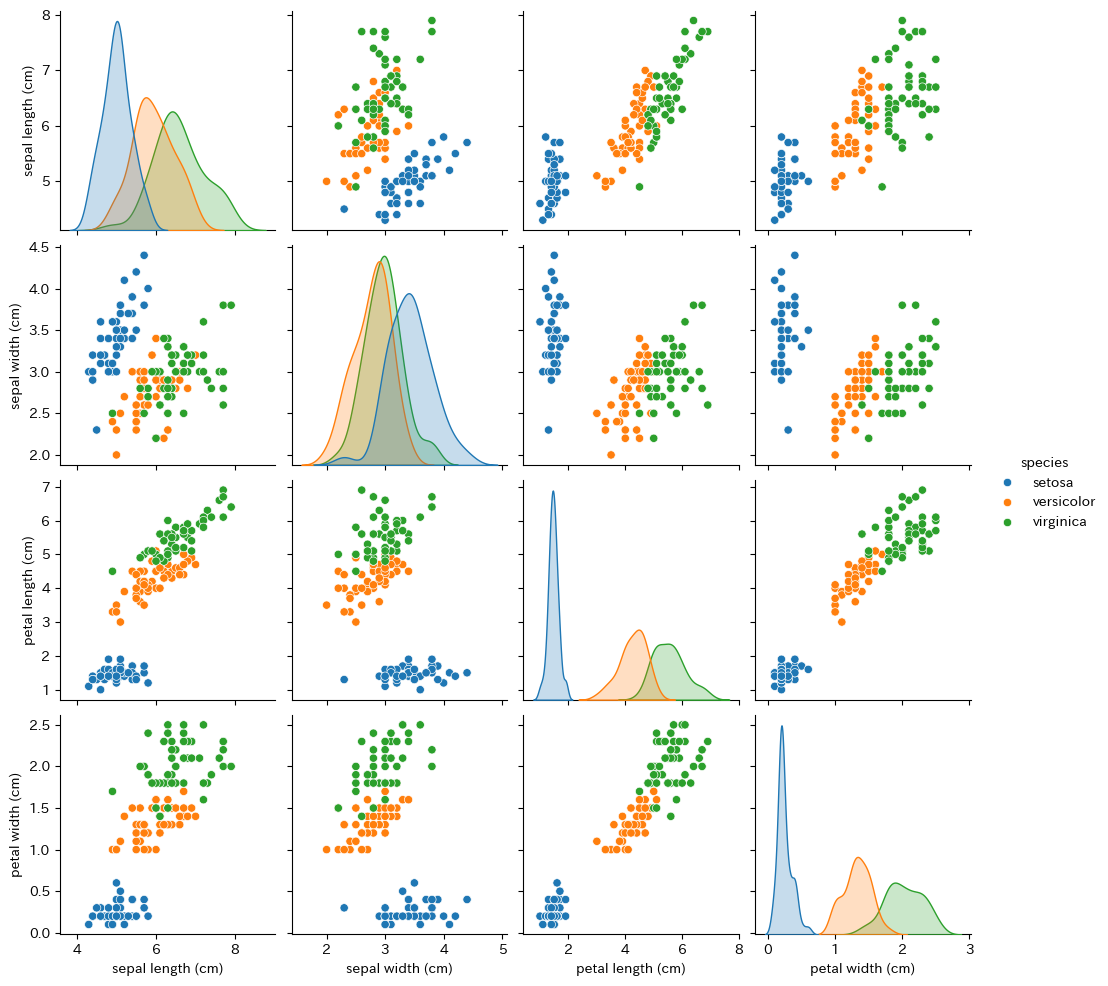

In [8]:
# ペアプロットを作成（対角成分をカーネル密度推定にする）
sns.pairplot(df, hue='species', diag_kind='kde')

# プロットを表示
plt.show()

各モデルの5分割交差検証の結果:
--------------------------------------------------
                   モデル      平均精度      標準偏差
0                  SVC  0.966667  0.021082
1        Random Forest  0.966667  0.021082
2       MLP Classifier  0.960000  0.024944
3                  KNN  0.960000  0.032660
4        Decision Tree  0.953333  0.026667
5    Gradient Boosting  0.953333  0.026667
6  Logistic Regression  0.953333  0.033993
7           Linear SVC  0.953333  0.040000


最良のモデル: SVC
平均精度: 0.9667


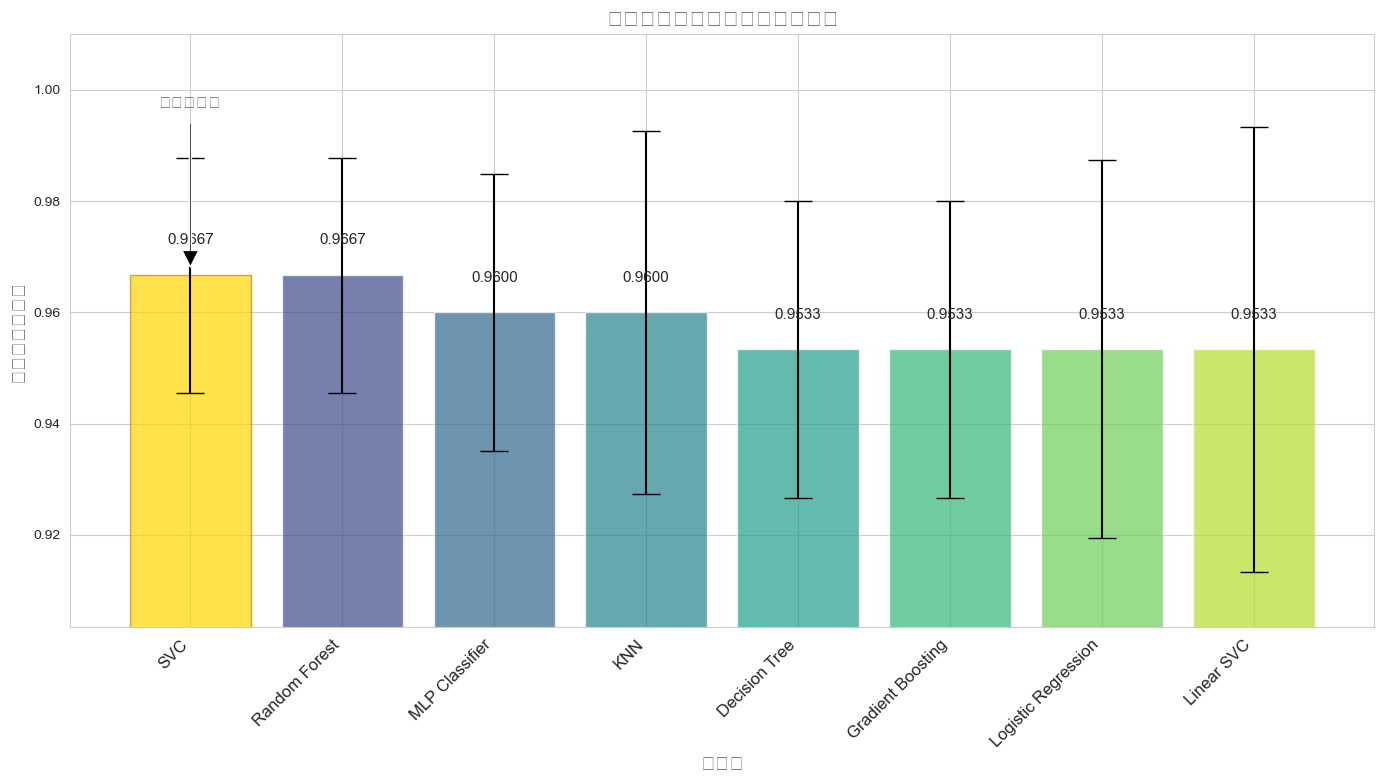

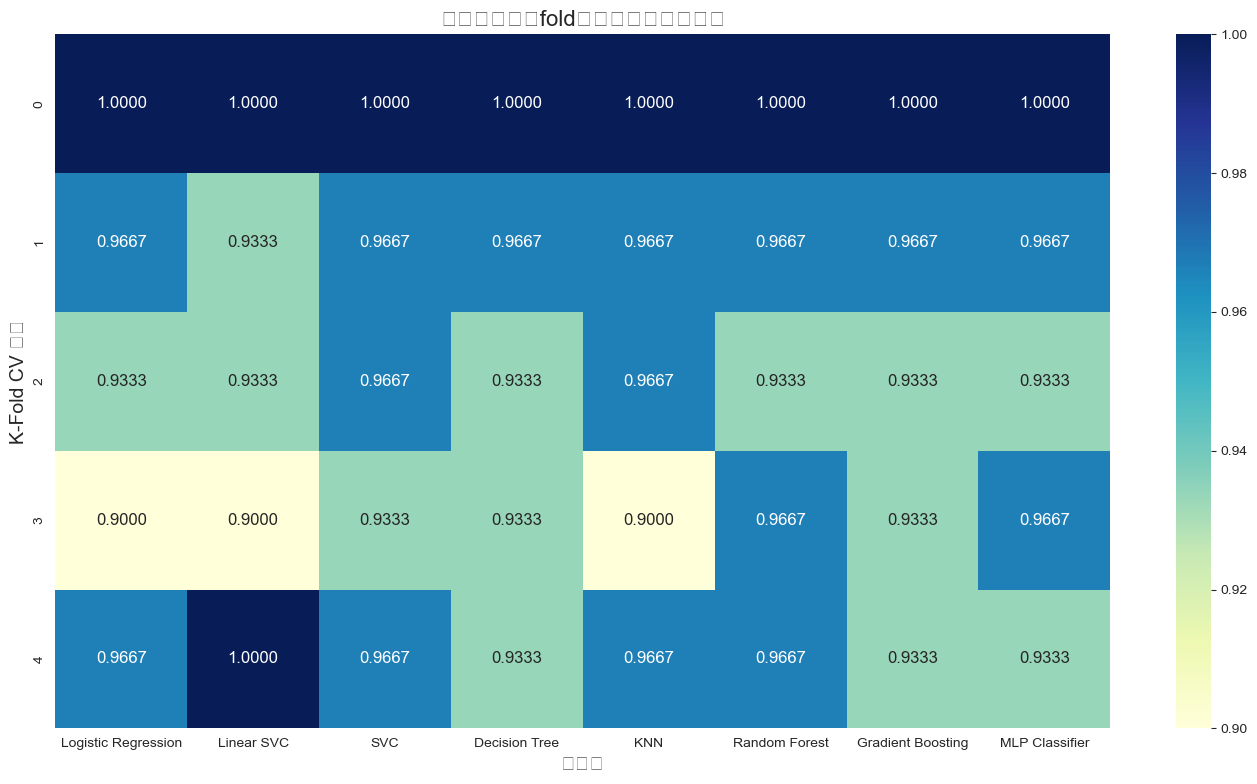

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import japanize_matplotlib

# irisデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# 5分割のk-fold交差検証を設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# テストするモデルのリスト
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Linear SVC': LinearSVC(random_state=42, max_iter=10000),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=1000)
}

# LinearRegressionは分類問題には適していないため除外（回帰モデルのため）

# 各モデルをk-fold検証で評価
results = {}
for name, model in models.items():
    # スケーリングを含むパイプライン
    pipeline = make_pipeline(StandardScaler(), model)
    
    # 交差検証スコアを計算
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    
    # 結果を保存
    results[name] = {
        'mean_score': np.mean(scores),
        'std_score': np.std(scores),
        'all_scores': scores
    }

# 結果をデータフレームに変換して表示
results_df = pd.DataFrame({
    'モデル': list(results.keys()),
    '平均精度': [results[name]['mean_score'] for name in results.keys()],
    '標準偏差': [results[name]['std_score'] for name in results.keys()]
})
# 平均精度で降順にソート
results_df = results_df.sort_values('平均精度', ascending=False).reset_index(drop=True)

# 結果の表示
print("各モデルの5分割交差検証の結果:")
print("-" * 50)
print(results_df)
print("\n")

# 最良のモデルを特定
best_model_name = results_df.iloc[0]['モデル']
best_score = results_df.iloc[0]['平均精度']
print("=" * 50)
print(f"最良のモデル: {best_model_name}")
print(f"平均精度: {best_score:.4f}")
print("=" * 50)

# グラフの作成
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 棒グラフの作成 - 平均精度でソート済みのデータを使用
bars = plt.bar(results_df['モデル'], results_df['平均精度'], 
               yerr=results_df['標準偏差'], capsize=10, 
               alpha=0.7, color=sns.color_palette("viridis", len(results_df)))

# 最良のモデルを強調表示
best_idx = results_df['モデル'].tolist().index(best_model_name)
bars[best_idx].set_color('gold')
bars[best_idx].set_edgecolor('darkgoldenrod')

# グラフの詳細設定
plt.title('モデルごとの交差検証精度比較', fontsize=16)
plt.xlabel('モデル', fontsize=14)
plt.ylabel('平均精度スコア', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(min(results_df['平均精度']) - 0.05, 1.01)  # 下限を調整

# 各バーの上に数値を表示
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{results_df.iloc[i]["平均精度"]:.4f}', ha='center', va='bottom', fontsize=11)

# 最良のモデルにラベル付け
plt.annotate('最良モデル', xy=(best_idx, best_score),
            xytext=(best_idx, best_score + 0.03),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# ヒートマップで各モデルの各foldでのスコアを可視化
plt.figure(figsize=(14, 8))
heatmap_data = pd.DataFrame()

for name, result in results.items():
    heatmap_data[name] = result['all_scores']

sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('各モデルの各foldにおける精度スコア', fontsize=16)
plt.xlabel('モデル', fontsize=14)
plt.ylabel('K-Fold CV 分割', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
#pip install japanize_matplotlib

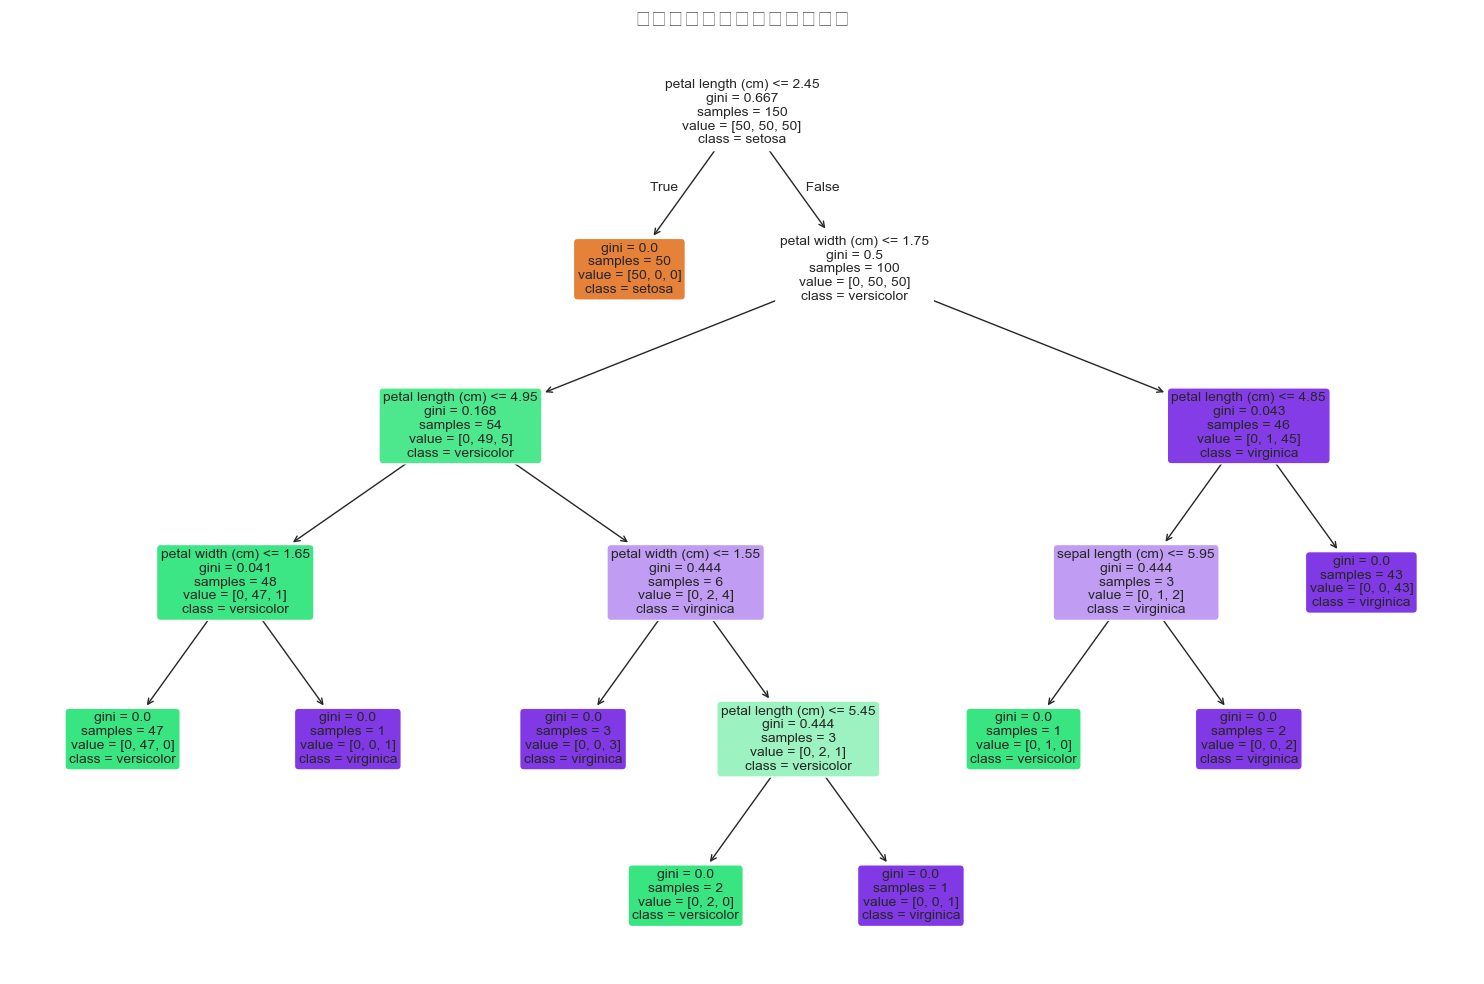

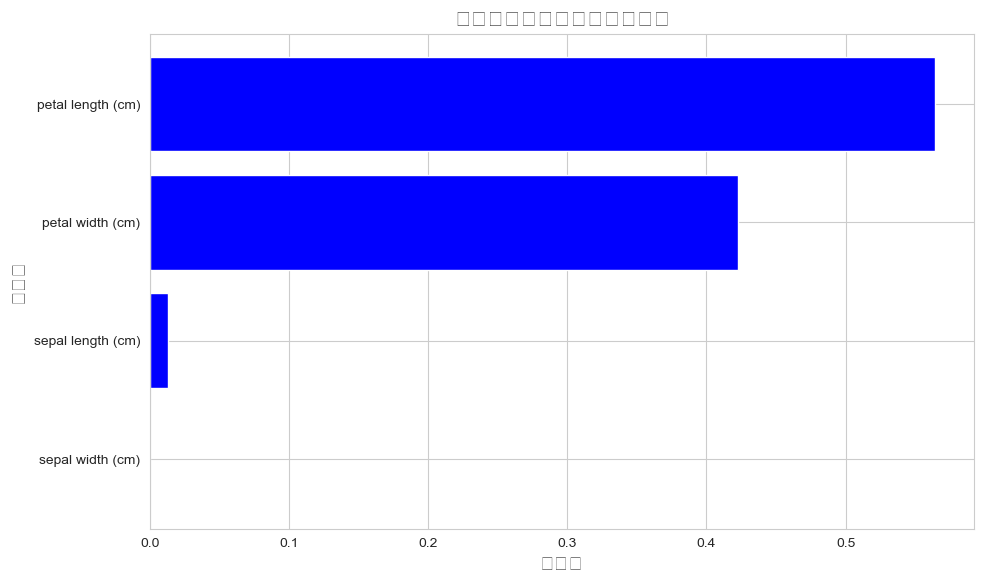

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# 決定木モデルのトレーニング
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X, y)

# 決定木の可視化
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, 
          class_names=iris.target_names, rounded=True, fontsize=10)
plt.title('アヤメデータセットの決定木', fontsize=16)
plt.tight_layout()
plt.show()

# 特徴量の重要度の可視化
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('決定木モデルの特徴量重要度', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('重要度', fontsize=14)
plt.ylabel('特徴量', fontsize=14)
plt.tight_layout()
plt.show()


LinearSVC Accuracy Results:
--------------------------------------------------
Fold 1:
  Original: 1.0000
  MinMaxScaler: 0.9667
  StandardScaler: 1.0000
  RobustScaler: 0.9667
  Normalizer: 0.9000

Fold 2:
  Original: 0.9667
  MinMaxScaler: 0.8667
  StandardScaler: 0.9333
  RobustScaler: 0.9333
  Normalizer: 0.9000

Fold 3:
  Original: 0.9333
  MinMaxScaler: 0.9333
  StandardScaler: 0.9333
  RobustScaler: 0.9333
  Normalizer: 0.8333

Fold 4:
  Original: 0.9667
  MinMaxScaler: 0.9333
  StandardScaler: 0.9000
  RobustScaler: 0.9000
  Normalizer: 0.9333

Fold 5:
  Original: 0.9667
  MinMaxScaler: 0.9333
  StandardScaler: 1.0000
  RobustScaler: 0.9333
  Normalizer: 1.0000


LinearSVC Average Accuracy:
--------------------------------------------------
Original: 0.9667
MinMaxScaler: 0.9267
StandardScaler: 0.9533
RobustScaler: 0.9333
Normalizer: 0.9133

K-means Clustering Average Accuracy:
--------------------------------------------------
Original: 0.2000
MinMaxScaler: 0.2867
StandardScal

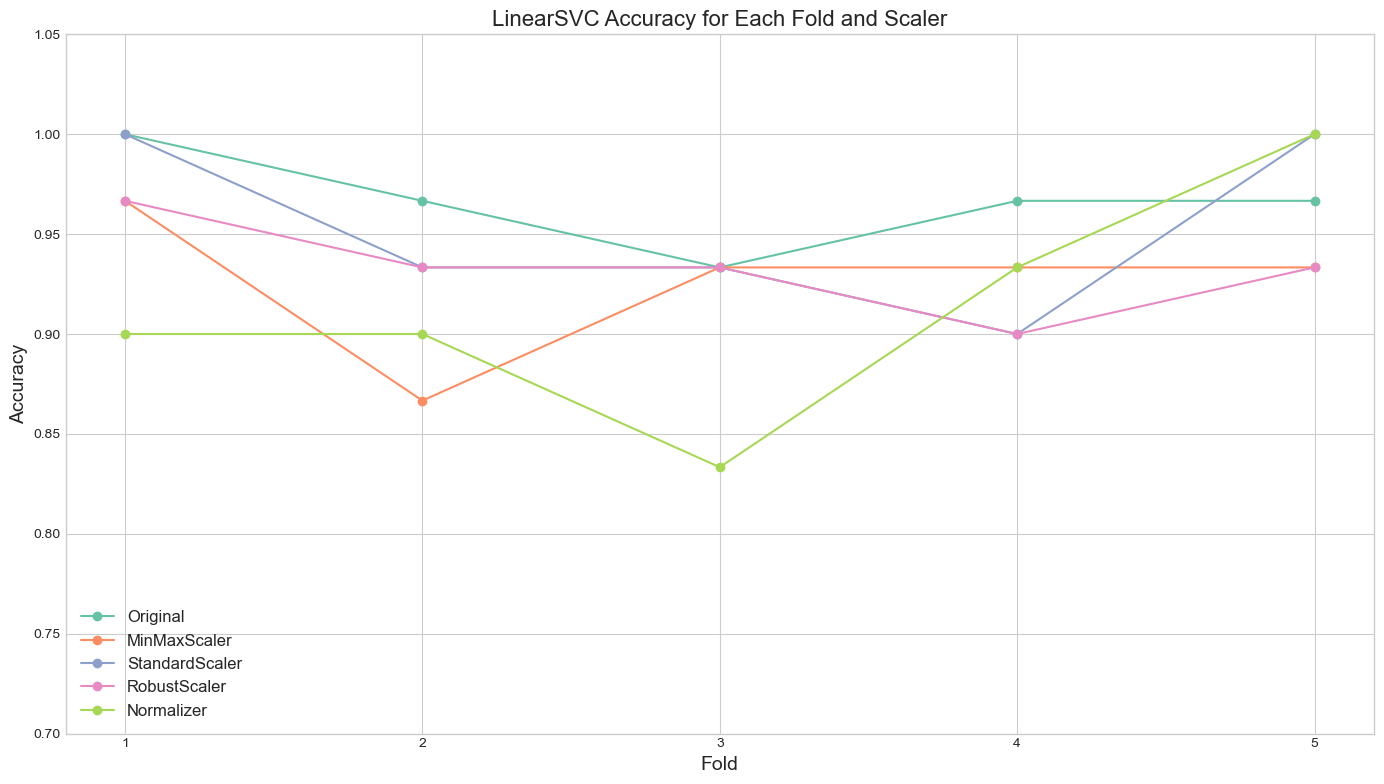

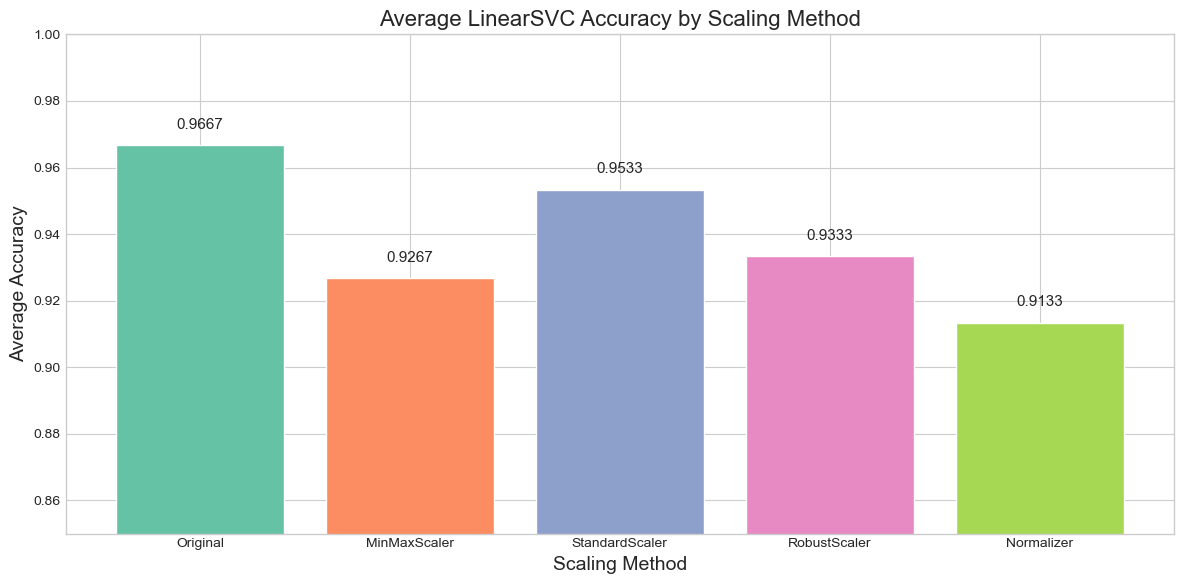

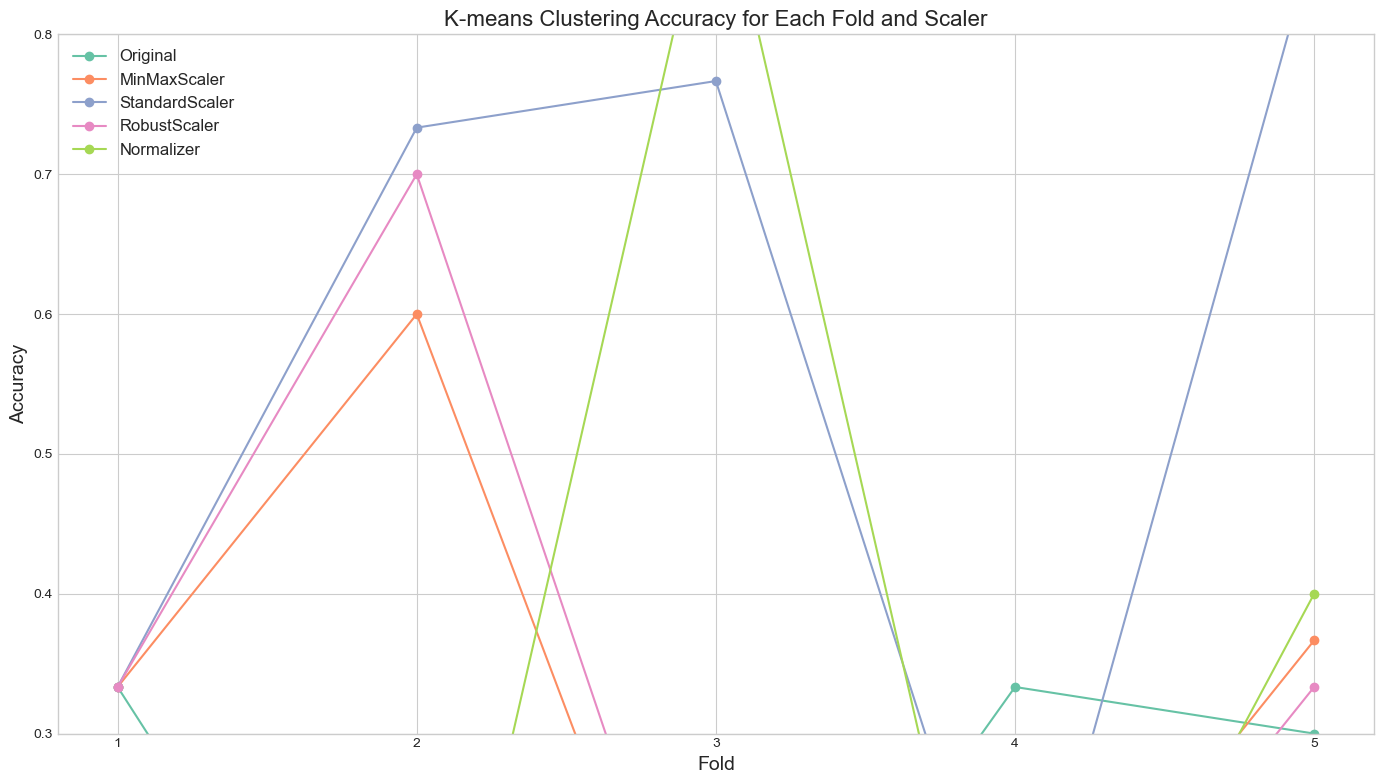

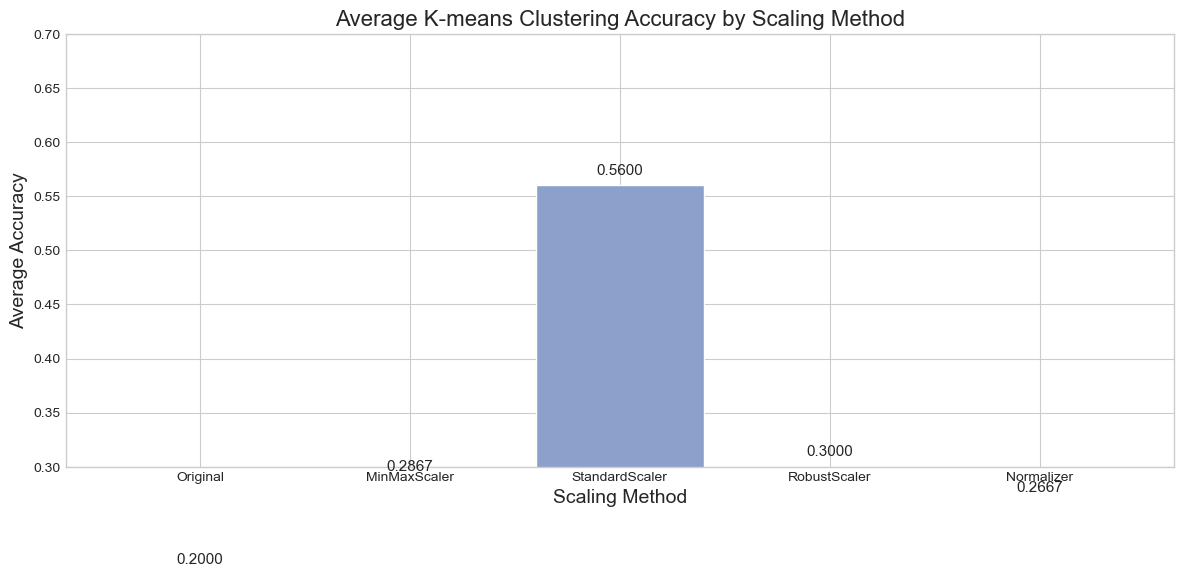

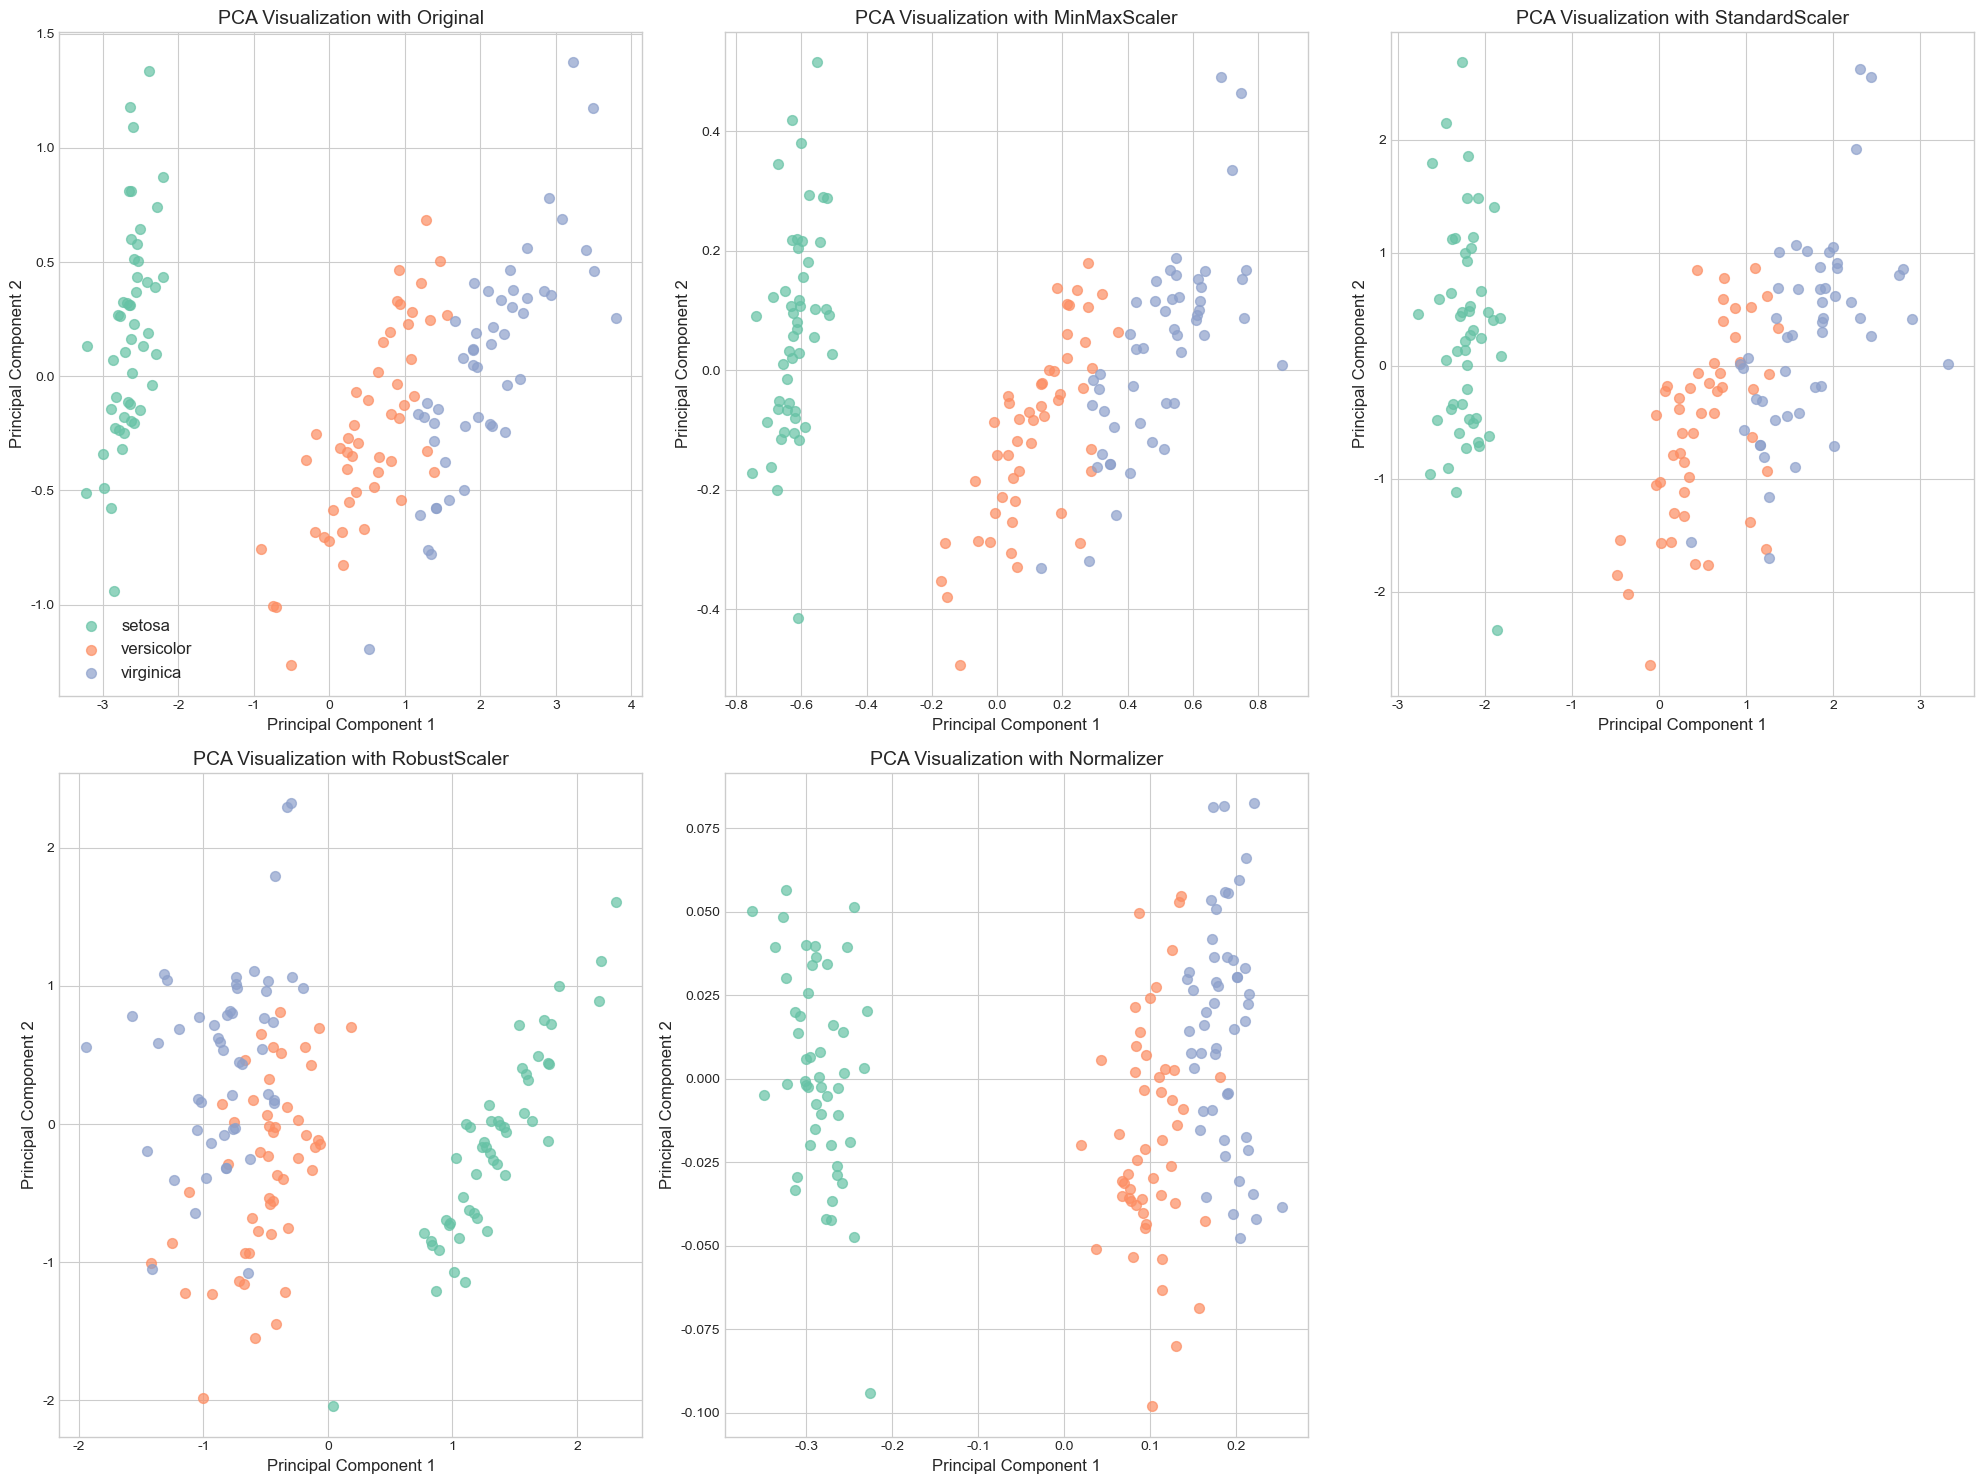

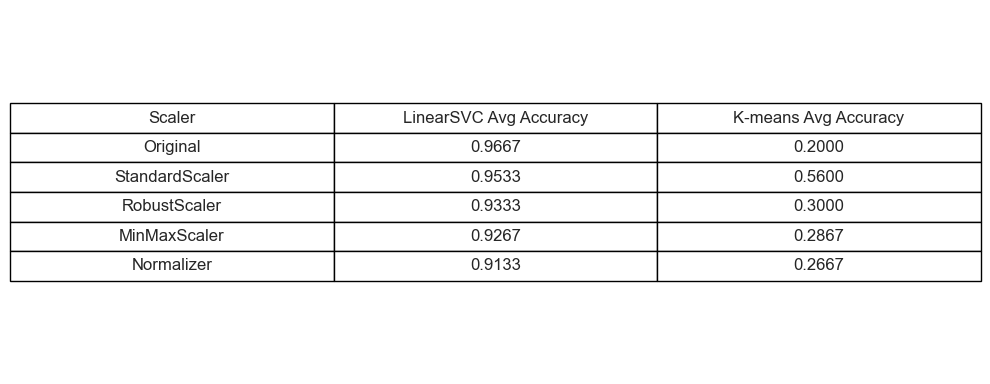

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scalers
scalers = {
    'Original': None,
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer()
}

# Initialize results dictionary
results = {scaler_name: [] for scaler_name in scalers.keys()}
cluster_results = {scaler_name: [] for scaler_name in scalers.keys()}

# Perform 5-fold cross-validation with different scalers
fold_indices = []
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X)):
    fold_indices.append((train_idx, test_idx))
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for scaler_name, scaler in scalers.items():
        # Apply scaling
        if scaler is not None:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test
        
        # Train LinearSVC model
        model = LinearSVC(random_state=42, max_iter=10000)
        model.fit(X_train_scaled, y_train)
        
        # Predict and calculate accuracy
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[scaler_name].append(accuracy)
        
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        kmeans.fit(X_train_scaled)
        cluster_pred = kmeans.predict(X_test_scaled)
        
        # Calculate clustering accuracy (using a simple matching approach)
        cluster_accuracy = np.mean(y_test == cluster_pred)
        cluster_results[scaler_name].append(cluster_accuracy)

# Calculate mean accuracies
mean_accuracies = {scaler_name: np.mean(accs) for scaler_name, accs in results.items()}
mean_cluster_accuracies = {scaler_name: np.mean(accs) for scaler_name, accs in cluster_results.items()}

# Visualization 1: LinearSVC Accuracy for each fold and scaler
plt.figure(figsize=(14, 8))
for i, scaler_name in enumerate(scalers.keys()):
    plt.plot(range(1, 6), results[scaler_name], marker='o', label=scaler_name)

plt.title('LinearSVC Accuracy for Each Fold and Scaler', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(range(1, 6))
plt.ylim(0.7, 1.05)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('linearSVC_accuracy_per_fold.png', dpi=300)

# Visualization 2: Average LinearSVC Accuracy per scaler
plt.figure(figsize=(12, 6))
scalers_list = list(scalers.keys())
accuracies = [mean_accuracies[s] for s in scalers_list]

bars = plt.bar(scalers_list, accuracies, color=sns.color_palette("Set2", len(scalers_list)))
plt.title('Average LinearSVC Accuracy by Scaling Method', fontsize=16)
plt.xlabel('Scaling Method', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.ylim(0.85, 1.0)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.4f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('average_linearSVC_accuracy.png', dpi=300)

# Visualization 3: K-means Clustering Accuracy
plt.figure(figsize=(14, 8))
for i, scaler_name in enumerate(scalers.keys()):
    plt.plot(range(1, 6), cluster_results[scaler_name], marker='o', label=scaler_name)

plt.title('K-means Clustering Accuracy for Each Fold and Scaler', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(range(1, 6))
plt.ylim(0.3, 0.8)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('kmeans_accuracy_per_fold.png', dpi=300)

# Visualization 4: Average Clustering Accuracy per scaler
plt.figure(figsize=(12, 6))
cluster_accuracies = [mean_cluster_accuracies[s] for s in scalers_list]

bars = plt.bar(scalers_list, cluster_accuracies, color=sns.color_palette("Set2", len(scalers_list)))
plt.title('Average K-means Clustering Accuracy by Scaling Method', fontsize=16)
plt.xlabel('Scaling Method', fontsize=14)
plt.ylabel('Average Accuracy', fontsize=14)
plt.ylim(0.3, 0.7)

# Add accuracy values on top of bars
for bar, acc in zip(bars, cluster_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('average_kmeans_accuracy.png', dpi=300)

# Visualization 5: Data visualization using PCA for each scaler
plt.figure(figsize=(20, 15))
for i, (scaler_name, scaler) in enumerate(scalers.items()):
    plt.subplot(2, 3, i+1)
    
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    
    # Apply PCA to visualize data in 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    for target in np.unique(y):
        plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], 
                    label=target_names[target], alpha=0.7, s=50)
    
    plt.title(f'PCA Visualization with {scaler_name}', fontsize=14)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    if i == 0:  # Only add legend to the first plot to avoid redundancy
        plt.legend(fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300)

# Print results
print("\nLinearSVC Accuracy Results:")
print("-" * 50)
for fold_idx in range(5):
    print(f"Fold {fold_idx+1}:")
    for scaler_name in scalers.keys():
        print(f"  {scaler_name}: {results[scaler_name][fold_idx]:.4f}")
    print()

print("\nLinearSVC Average Accuracy:")
print("-" * 50)
for scaler_name, mean_acc in mean_accuracies.items():
    print(f"{scaler_name}: {mean_acc:.4f}")

print("\nK-means Clustering Average Accuracy:")
print("-" * 50)
for scaler_name, mean_acc in mean_cluster_accuracies.items():
    print(f"{scaler_name}: {mean_acc:.4f}")

# Create a summary table
summary_df = pd.DataFrame({
    'Scaler': list(scalers.keys()),
    'LinearSVC Avg Accuracy': [mean_accuracies[s] for s in scalers.keys()],
    'K-means Avg Accuracy': [mean_cluster_accuracies[s] for s in scalers.keys()]
})

# Sort by LinearSVC accuracy (descending)
summary_df = summary_df.sort_values('LinearSVC Avg Accuracy', ascending=False)
print("\nSummary Table (sorted by LinearSVC accuracy):")
print("-" * 80)
print(summary_df.to_string(index=False))

# Save the summary table as a figure
plt.figure(figsize=(10, 4))
plt.axis('off')
# データフレームを正しくフォーマットして表示用に準備
formatted_values = [[row[0]] + [f"{val:.4f}" for val in row[1:]] for row in summary_df.values]
table = plt.table(cellText=formatted_values,
                 colLabels=summary_df.columns,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)
plt.tight_layout()
plt.savefig('summary_table.png', dpi=300, bbox_inches='tight')

print("\nAnalysis complete. All visualizations and results have been generated.")

PCA Analysis


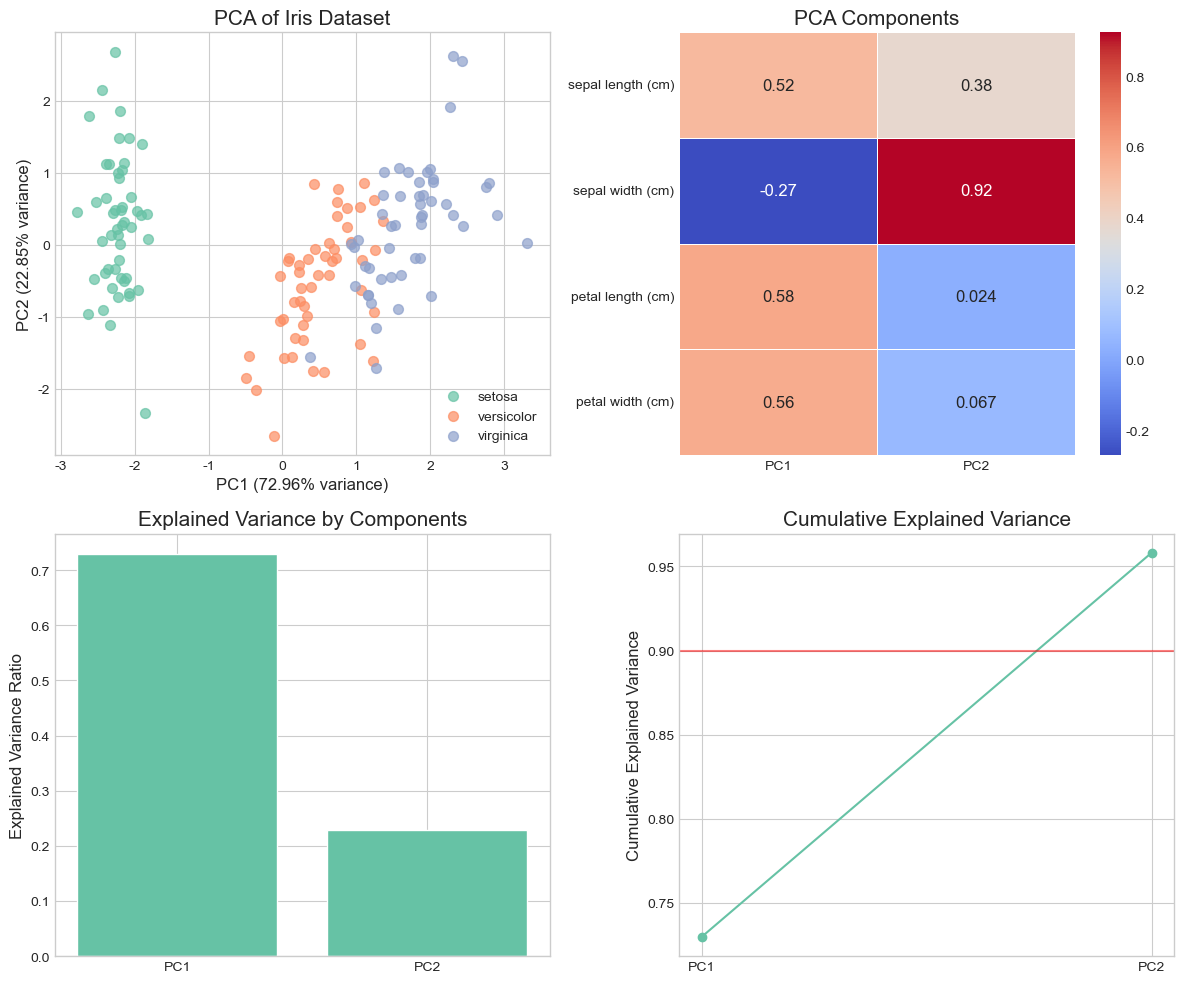

PCA Results:
Explained variance ratio: [0.72962445 0.22850762]
Cumulative explained variance: 0.9581

Component loadings (eigenvectors):
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

Scaled Data Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

Scaled Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15

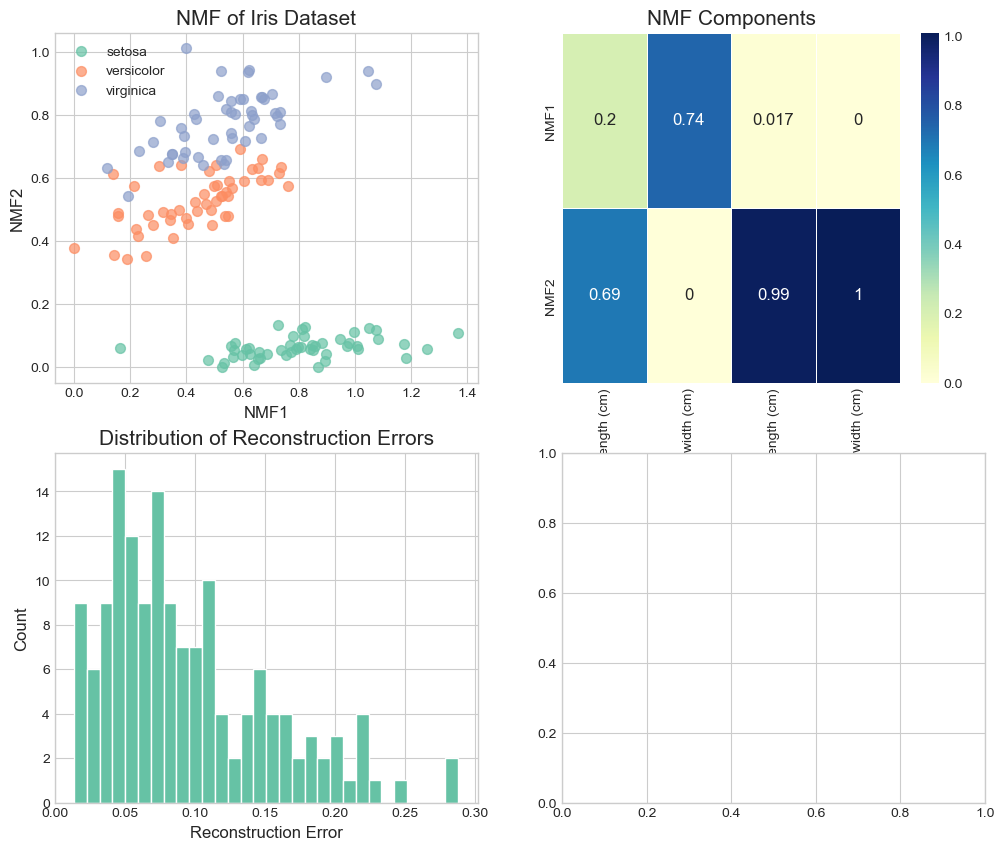

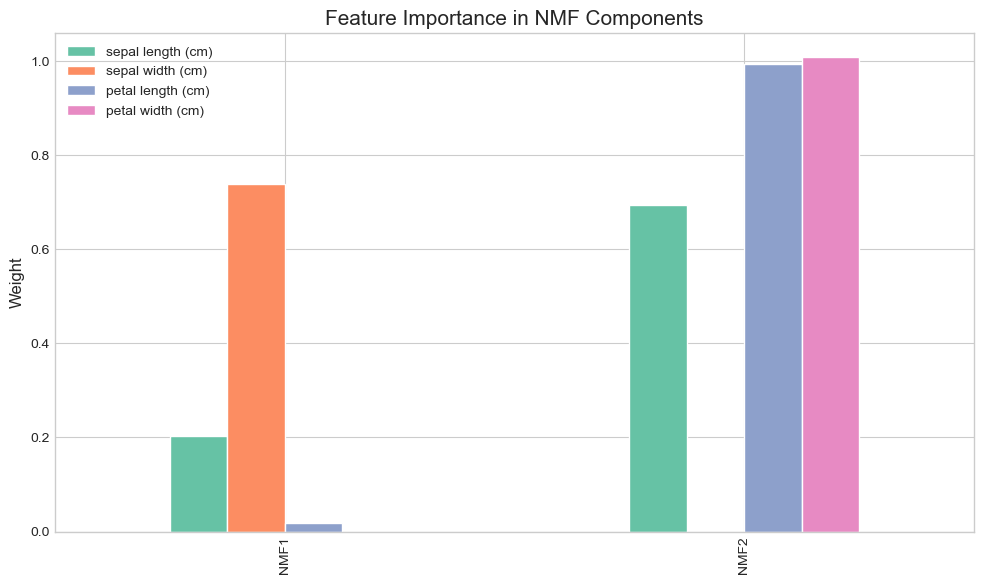

NMF Results:
Component weights:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
NMF1           0.202594          0.738257           0.017169          0.000000
NMF2           0.693169          0.000000           0.994318          1.008527

Average reconstruction error: 0.0949

t-SNE Analysis


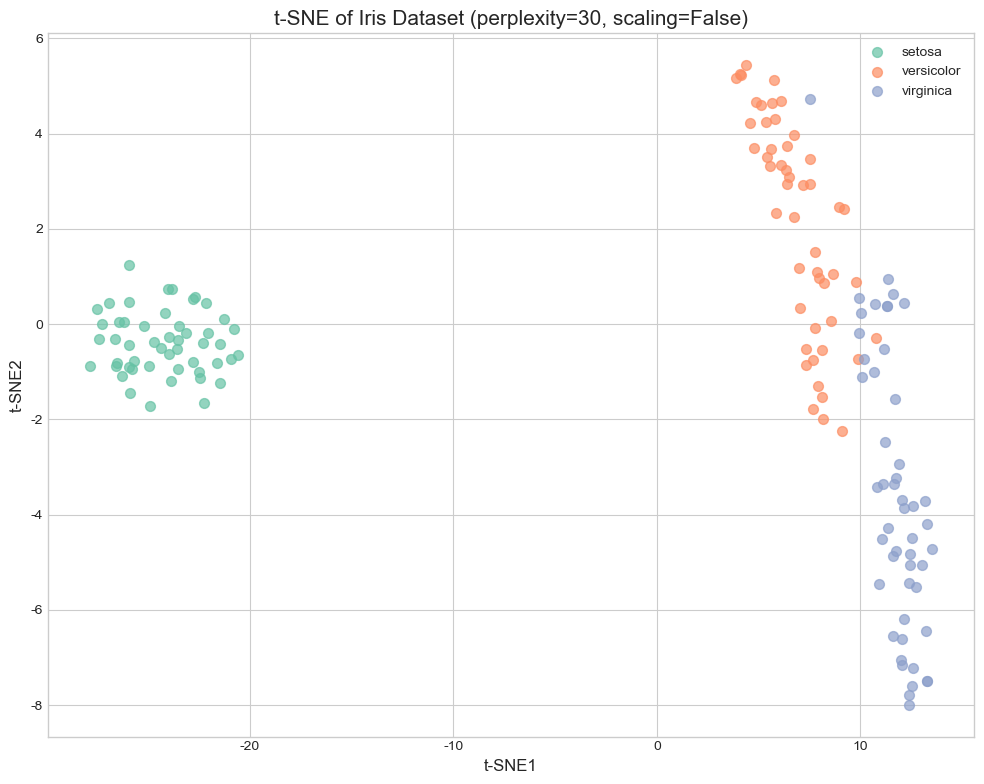

t-SNE Results (perplexity=30, scaling=False):
t-SNE doesn't provide component loadings like PCA.
It's primarily used for visualization of high-dimensional data.

K-means Clustering


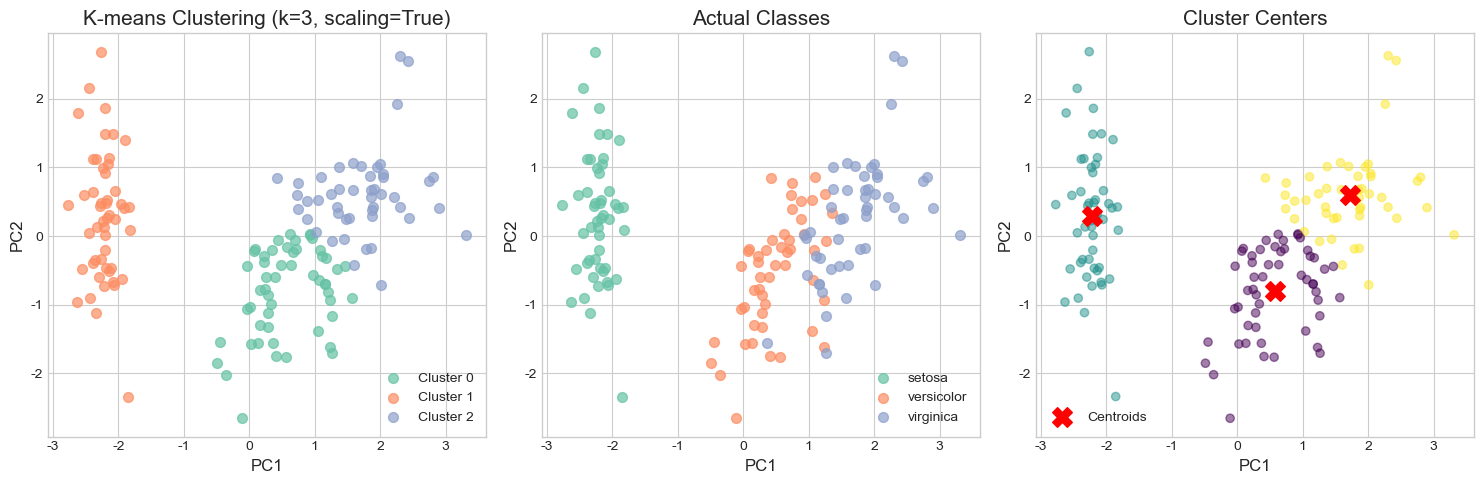

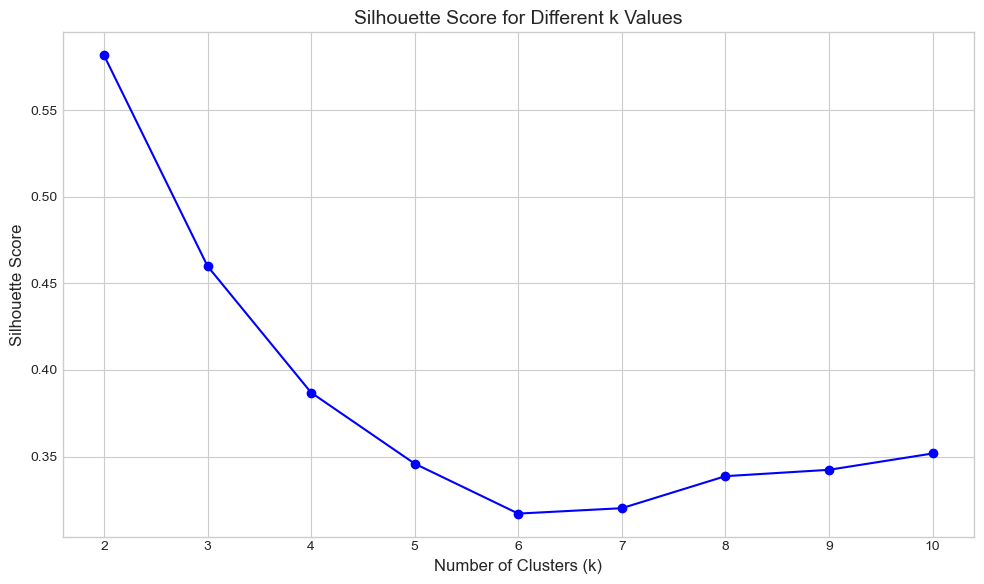

K-means Results (k=3, scaling=True):
Silhouette Score: 0.4599
Cluster Centers:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.574460          1.957499          -1.270273         -1.204063
1           0.803747          0.021485           0.497517          0.378223
2          -1.423218         -0.074430          -1.333122         -1.323671
3           0.910105          0.238893           0.996423          1.324512
4          -0.380372         -1.553783           0.097426         -0.006866
5           1.926569         -0.311021           1.425862          1.039309
6          -0.975690          0.876502          -1.305041         -1.233958
7           2.128516          1.556130           1.501645          1.361077
8           0.335231         -0.730491           0.799703          0.849905
9          -0.092895         -0.451697           0.270167          0.161761

Cluster Distribution:
         setosa  versicolor  virginica
Cluster                

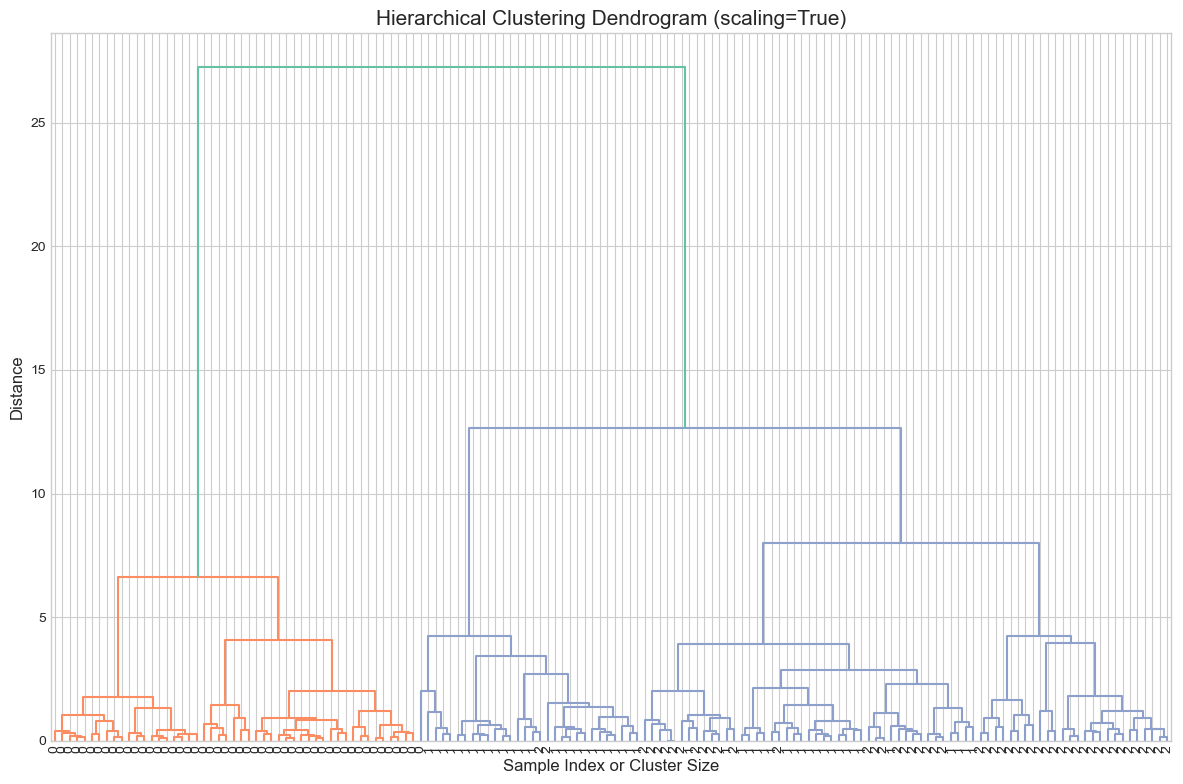

Hierarchical Clustering Results (scaling=True, truncate=False):
The dendrogram shows the hierarchical relationship between points.
The y-axis represents the distance or dissimilarity between clusters.
The x-axis represents the samples or clusters being merged.

Hierarchical Clustering (Truncated Dendrogram)


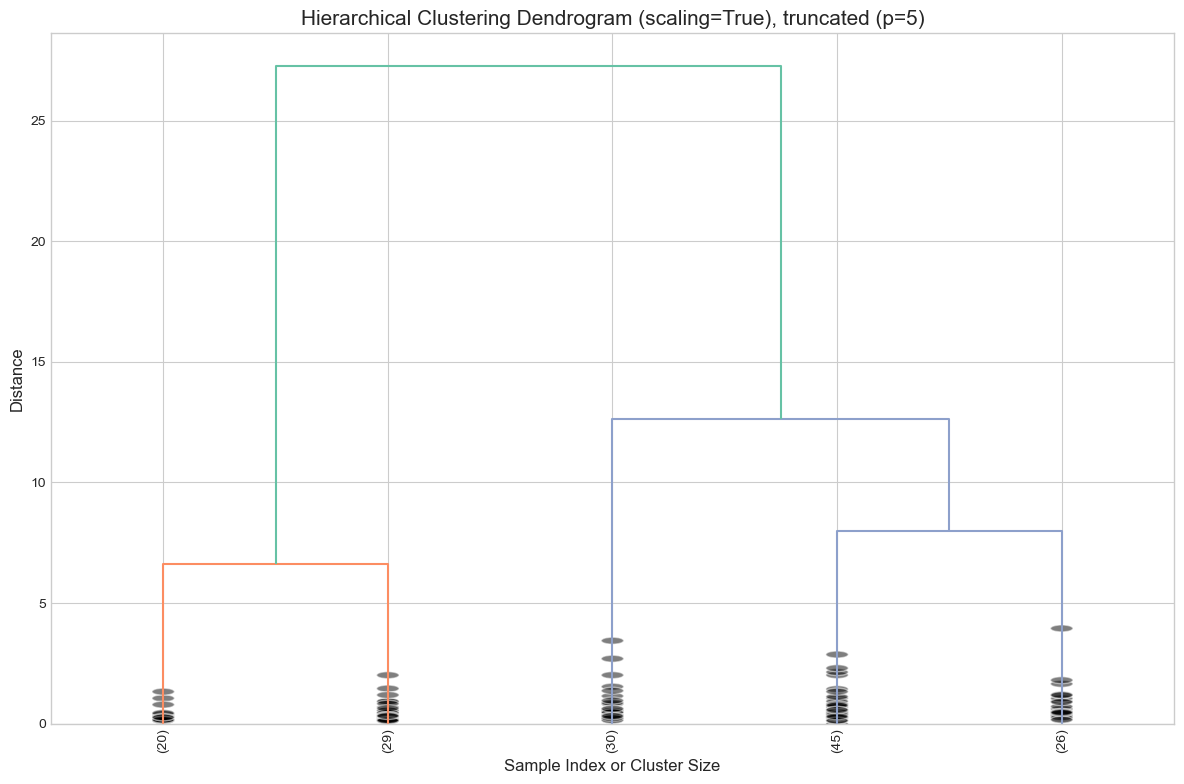

Hierarchical Clustering Results (scaling=True, truncate=True):
The dendrogram shows the hierarchical relationship between points.
The y-axis represents the distance or dissimilarity between clusters.
The x-axis represents the samples or clusters being merged.

DBSCAN Clustering


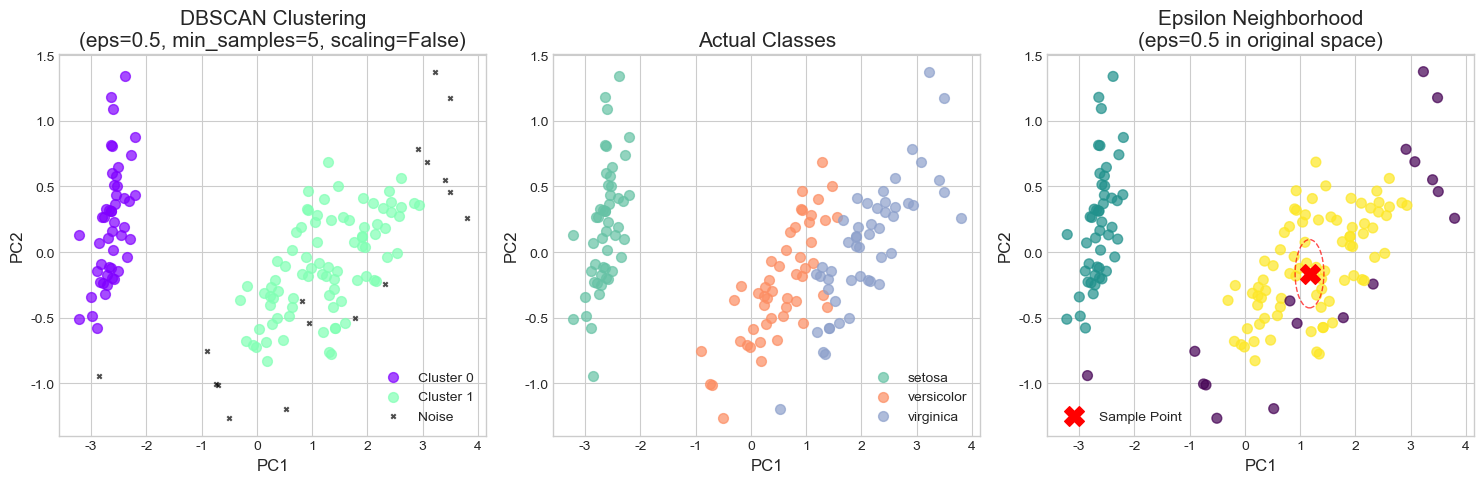

DBSCAN Results (eps=0.5, min_samples=5, scaling=False):
Number of clusters: 2
Number of noise points: 17
Silhouette Score: 0.7353564754798495

Cluster Distribution:
         setosa  versicolor  virginica
Cluster                               
-1            1           6         10
 0           49           0          0
 1            0          44         40

DBSCAN Clustering with Scaling


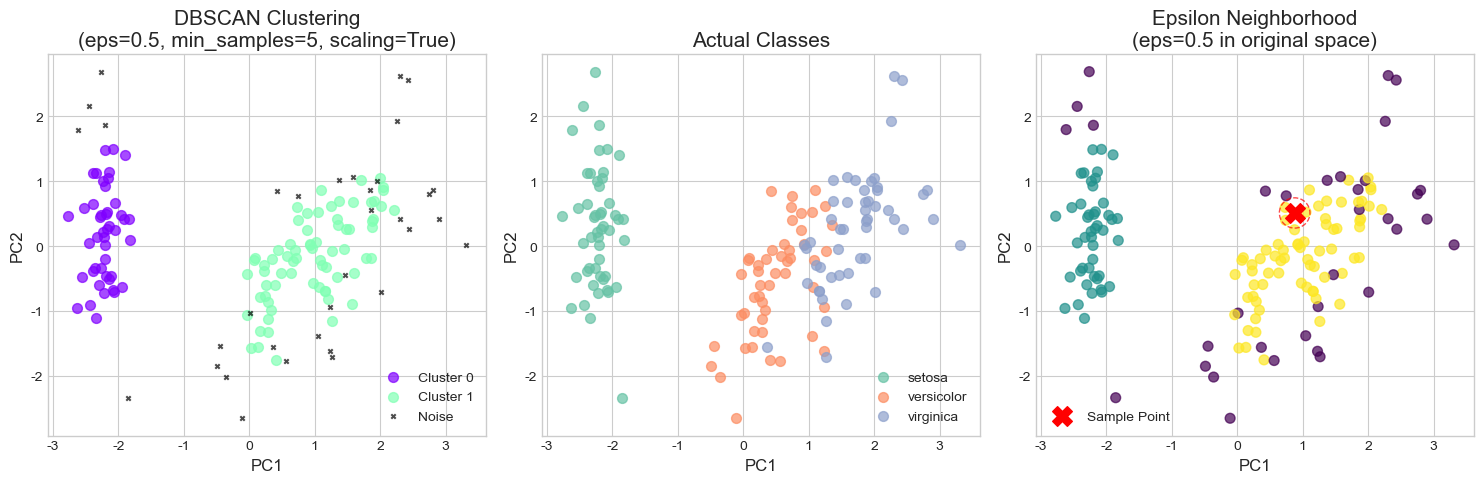

DBSCAN Results (eps=0.5, min_samples=5, scaling=True):
Number of clusters: 2
Number of noise points: 34
Silhouette Score: 0.6558885287002016

Cluster Distribution:
         setosa  versicolor  virginica
Cluster                               
-1            5          11         18
 0           45           0          0
 1            0          39         32


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# 可視化のスタイル設定
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

class IrisAnalyzer:
    def __init__(self):
        # アイリスデータセットのロード
        self.iris = load_iris()
        self.X = self.iris.data
        self.y = self.iris.target
        self.feature_names = self.iris.feature_names
        self.target_names = self.iris.target_names
        
        # データフレームの作成
        self.df = pd.DataFrame(self.X, columns=self.feature_names)
        self.df['target'] = self.y
        self.df['species'] = [self.target_names[i] for i in self.y]
        
    def scale_data(self):
        """データの標準化"""
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.X)
        
        # スケーリングされたデータをデータフレームに変換
        df_scaled = pd.DataFrame(X_scaled, columns=self.feature_names)
        df_scaled['target'] = self.y
        df_scaled['species'] = [self.target_names[i] for i in self.y]
        
        return X_scaled, df_scaled
    
    def plot_pca(self, n_components=2):
        """PCAの実行と可視化"""
        # データの標準化
        X_scaled, df_scaled = self.scale_data()
        
        # PCAの実行
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)
        
        # PCA結果をデータフレームに変換
        df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
        df_pca['target'] = self.y
        df_pca['species'] = [self.target_names[i] for i in self.y]
        
        # PCAの結果を可視化
        plt.figure(figsize=(12, 10))
        
        # 散布図
        plt.subplot(2, 2, 1)
        for target in np.unique(self.y):
            plt.scatter(X_pca[self.y == target, 0], X_pca[self.y == target, 1], 
                      label=self.target_names[target], alpha=0.7, s=50)
        plt.title('PCA of Iris Dataset', fontsize=15)
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # 固有ベクトルの可視化
        plt.subplot(2, 2, 2)
        components = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], 
                                  index=self.feature_names)
        sns.heatmap(components, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('PCA Components', fontsize=15)
        
        # 説明分散比の可視化
        plt.subplot(2, 2, 3)
        plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
        plt.xticks(range(1, n_components + 1), [f'PC{i}' for i in range(1, n_components + 1)])
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Components', fontsize=15)
        
        # 累積説明分散
        plt.subplot(2, 2, 4)
        plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
        plt.xticks(range(1, n_components + 1), [f'PC{i}' for i in range(1, n_components + 1)])
        plt.ylabel('Cumulative Explained Variance')
        plt.axhline(y=0.9, color='r', linestyle='-', alpha=0.5)
        plt.title('Cumulative Explained Variance', fontsize=15)
        
        plt.tight_layout()
        plt.savefig('pca_analysis.png', dpi=300)
        plt.show()
        
        print("PCA Results:")
        print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
        print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")
        print("\nComponent loadings (eigenvectors):")
        print(pd.DataFrame(pca.components_.T, index=self.feature_names, 
                          columns=[f'PC{i+1}' for i in range(n_components)]))
        
        return X_scaled, df_pca, pca
    
    def plot_nmf(self, n_components=2):
        """NMFの実行と可視化"""
        # データの前処理（NMFは負の値を扱えないため、MinMaxスケーリングを使用）
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(self.X)
        
        # NMFの実行
        nmf = NMF(n_components=n_components, init='random', random_state=42)
        X_nmf = nmf.fit_transform(X_scaled)
        
        # NMF結果をデータフレームに変換
        df_nmf = pd.DataFrame(X_nmf, columns=[f'NMF{i+1}' for i in range(n_components)])
        df_nmf['target'] = self.y
        df_nmf['species'] = [self.target_names[i] for i in self.y]
        
        # NMFの結果を可視化
        plt.figure(figsize=(12, 10))
        
        # 散布図
        plt.subplot(2, 2, 1)
        for target in np.unique(self.y):
            plt.scatter(X_nmf[self.y == target, 0], X_nmf[self.y == target, 1], 
                      label=self.target_names[target], alpha=0.7, s=50)
        plt.title('NMF of Iris Dataset', fontsize=15)
        plt.xlabel('NMF1', fontsize=12)
        plt.ylabel('NMF2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # 成分の可視化
        plt.subplot(2, 2, 2)
        components = pd.DataFrame(nmf.components_, index=[f'NMF{i+1}' for i in range(n_components)], 
                                 columns=self.feature_names)
        sns.heatmap(components, annot=True, cmap='YlGnBu', linewidths=0.5)
        plt.title('NMF Components', fontsize=15)
        
        # 再構成誤差の可視化
        plt.subplot(2, 2, 3)
        X_reconstructed = nmf.inverse_transform(X_nmf)
        reconstruction_errors = np.linalg.norm(X_scaled - X_reconstructed, axis=1)
        plt.hist(reconstruction_errors, bins=30)
        plt.xlabel('Reconstruction Error')
        plt.ylabel('Count')
        plt.title('Distribution of Reconstruction Errors', fontsize=15)
        
        # 特徴量の寄与度
        plt.subplot(2, 2, 4)
        feature_importance = pd.DataFrame(
            {feature: nmf.components_[:, i] for i, feature in enumerate(self.feature_names)},
            index=[f'NMF{i+1}' for i in range(n_components)]
        )
        feature_importance.plot(kind='bar', figsize=(10, 6))
        plt.title('Feature Importance in NMF Components', fontsize=15)
        plt.ylabel('Weight')
        
        plt.tight_layout()
        plt.savefig('nmf_analysis.png', dpi=300)
        plt.show()
        
        print("NMF Results:")
        print("Component weights:")
        print(pd.DataFrame(nmf.components_, index=[f'NMF{i+1}' for i in range(n_components)], 
                          columns=self.feature_names))
        print(f"\nAverage reconstruction error: {np.mean(reconstruction_errors):.4f}")
        
        return X_scaled, df_nmf, nmf
    
    def plot_tsne(self, scaling=False, perplexity=30, n_iter=1000):
        """t-SNEの実行と可視化"""
        # データのスケーリング（オプション）
        if scaling:
            X_input, _ = self.scale_data()
        else:
            X_input = self.X
        
        # t-SNEの実行
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
        X_tsne = tsne.fit_transform(X_input)
        
        # t-SNE結果をデータフレームに変換
        df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
        df_tsne['target'] = self.y
        df_tsne['species'] = [self.target_names[i] for i in self.y]
        
        # t-SNEの結果を可視化
        plt.figure(figsize=(10, 8))
        for target in np.unique(self.y):
            plt.scatter(X_tsne[self.y == target, 0], X_tsne[self.y == target, 1], 
                      label=self.target_names[target], alpha=0.7, s=50)
        plt.title(f't-SNE of Iris Dataset (perplexity={perplexity}, scaling={scaling})', fontsize=15)
        plt.xlabel('t-SNE1', fontsize=12)
        plt.ylabel('t-SNE2', fontsize=12)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'tsne_analysis_scaling_{scaling}.png', dpi=300)
        plt.show()
        
        print(f"t-SNE Results (perplexity={perplexity}, scaling={scaling}):")
        print("t-SNE doesn't provide component loadings like PCA.")
        print("It's primarily used for visualization of high-dimensional data.")
        
        return df_tsne, tsne
    
    def plot_k_means(self, n_clusters=3, scaling=True):
        """K-meansクラスタリングの実行と可視化"""
        # データのスケーリング（オプション）
        if scaling:
            X_input, _ = self.scale_data()
        else:
            X_input = self.X
        
        # K-meansの実行
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_input)
        
        # シルエットスコアの計算
        silhouette_avg = silhouette_score(X_input, cluster_labels)
        
        # PCAを使用して2次元に次元削減
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_input)
        
        # クラスタリング結果を可視化
        plt.figure(figsize=(15, 5))
        
        # クラスタと実際のクラスラベルの比較
        plt.subplot(1, 3, 1)
        for i in range(n_clusters):
            plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                       label=f'Cluster {i}', alpha=0.7, s=50)
        plt.title(f'K-means Clustering (k={n_clusters}, scaling={scaling})', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # 実際のクラスラベル
        plt.subplot(1, 3, 2)
        for target in np.unique(self.y):
            plt.scatter(X_pca[self.y == target, 0], X_pca[self.y == target, 1], 
                       label=self.target_names[target], alpha=0.7, s=50)
        plt.title('Actual Classes', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # クラスタセンターの可視化
        plt.subplot(1, 3, 3)
        centers = kmeans.cluster_centers_
        centers_pca = pca.transform(centers)
        
        # 全データポイントの散布図
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, alpha=0.5, cmap='viridis')
        
        # クラスタセンターの散布図
        plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, alpha=1, label='Centroids')
        plt.title('Cluster Centers', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        plt.tight_layout()
        plt.savefig(f'kmeans_analysis_k_{n_clusters}_scaling_{scaling}.png', dpi=300)
        plt.show()
        
        # 異なるkの値に対するシルエットスコア
        if n_clusters == 3:  # デフォルトのkで実行された場合のみ
            k_range = range(2, 11)
            silhouette_scores = []
            
            for k in k_range:
                kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
                cluster_labels = kmeans.fit_predict(X_input)
                silhouette_scores.append(silhouette_score(X_input, cluster_labels))
            
            plt.figure(figsize=(10, 6))
            plt.plot(k_range, silhouette_scores, 'bo-')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Silhouette Score')
            plt.title('Silhouette Score for Different k Values')
            plt.grid(True)
            plt.tight_layout()
            plt.savefig('kmeans_silhouette_scores.png', dpi=300)
            plt.show()
        
        print(f"K-means Results (k={n_clusters}, scaling={scaling}):")
        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print("Cluster Centers:")
        print(pd.DataFrame(kmeans.cluster_centers_, columns=self.feature_names))
        
        # クラスタごとの実際のクラスラベルの分布
        cluster_distribution = pd.crosstab(cluster_labels, self.y, 
                                          rownames=['Cluster'], 
                                          colnames=['Actual Class'])
        cluster_distribution.columns = [self.target_names[i] for i in range(len(self.target_names))]
        print("\nCluster Distribution:")
        print(cluster_distribution)
        
        return cluster_labels, kmeans
    
    def plot_dendrogram(self, scaling=True, truncate=False, p=5):
        """階層的クラスタリングとデンドログラムの可視化"""
        # データのスケーリング（オプション）
        if scaling:
            X_input, _ = self.scale_data()
        else:
            X_input = self.X
        
        # 階層的クラスタリングのリンケージ行列の計算
        linked = linkage(X_input, method='ward')
        
        # デンドログラムの可視化
        plt.figure(figsize=(12, 8))
        
        if truncate:
            dendrogram(linked, truncate_mode='lastp', p=p, orientation='top', 
                      labels=self.y, leaf_font_size=10, leaf_rotation=90,
                      show_contracted=True, color_threshold=0.7 * max(linked[:, 2]))
            title_suffix = f", truncated (p={p})"
        else:
            dendrogram(linked, orientation='top', labels=self.y, 
                     leaf_font_size=10, leaf_rotation=90,
                     color_threshold=0.7 * max(linked[:, 2]))
            title_suffix = ""
        
        plt.title(f'Hierarchical Clustering Dendrogram (scaling={scaling}){title_suffix}', fontsize=15)
        plt.xlabel('Sample Index or Cluster Size')
        plt.ylabel('Distance')
        plt.tight_layout()
        plt.savefig(f'dendrogram_scaling_{scaling}_truncate_{truncate}.png', dpi=300)
        plt.show()
        
        print(f"Hierarchical Clustering Results (scaling={scaling}, truncate={truncate}):")
        print("The dendrogram shows the hierarchical relationship between points.")
        print("The y-axis represents the distance or dissimilarity between clusters.")
        print("The x-axis represents the samples or clusters being merged.")
        
        return linked
    
    def plot_dbscan(self, scaling=False, eps=0.5, min_samples=5):
        """DBSCANクラスタリングの実行と可視化"""
        # データのスケーリング（オプション）
        if scaling:
            X_input, _ = self.scale_data()
        else:
            X_input = self.X
        
        # DBSCANの実行
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_input)
        
        # クラスター数の取得（-1はノイズ）
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        # シルエットスコアの計算（ノイズポイントを除く）
        if len(set(cluster_labels)) > 1 and -1 not in cluster_labels:
            silhouette_avg = silhouette_score(X_input, cluster_labels)
        elif len(set(cluster_labels)) > 1 and -1 in cluster_labels and len(set(cluster_labels)) > 2:
            # ノイズポイントを除いた場合のシルエットスコア
            mask = cluster_labels != -1
            silhouette_avg = silhouette_score(X_input[mask], cluster_labels[mask])
        else:
            silhouette_avg = "Not applicable (insufficient clusters)"
        
        # PCAを使用して2次元に次元削減
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_input)
        
        # クラスタリング結果を可視化
        plt.figure(figsize=(15, 5))
        
        # DBSCANクラスタ
        plt.subplot(1, 3, 1)
        unique_labels = set(cluster_labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        
        for label, col in zip(unique_labels, colors):
            if label == -1:
                # ノイズポイント（黒で表示）
                col = 'k'
                markersize = 10
                marker = 'x'
                label_name = 'Noise'
            else:
                markersize = 50
                marker = 'o'
                label_name = f'Cluster {label}'
            
            mask = cluster_labels == label
            plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[col], marker=marker, 
                       label=label_name, s=markersize, alpha=0.7)
            
        plt.title(f'DBSCAN Clustering\n(eps={eps}, min_samples={min_samples}, scaling={scaling})', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # 実際のクラスラベル
        plt.subplot(1, 3, 2)
        for target in np.unique(self.y):
            plt.scatter(X_pca[self.y == target, 0], X_pca[self.y == target, 1], 
                       label=self.target_names[target], alpha=0.7, s=50)
        plt.title('Actual Classes', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        # epsの可視化
        plt.subplot(1, 3, 3)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, s=50)
        
        # サンプルポイントを選択してeps半径の円を描画
        from matplotlib.patches import Circle
        sample_idx = np.random.choice(len(X_pca))
        sample_point = X_pca[sample_idx]
        
        # PCA空間でのeps値を推定（近似）
        from sklearn.metrics import pairwise_distances
        distances = pairwise_distances([X_input[sample_idx]], X_input)[0]
        sorted_dist = np.sort(distances)
        k_distance = sorted_dist[min_samples]
        
        # PCA空間での対応する点までの距離を計算
        pca_distances = pairwise_distances([X_pca[sample_idx]], X_pca)[0]
        ratio = pca_distances[distances <= eps].mean() / eps if any(distances <= eps) else 1
        
        circle = Circle(sample_point, eps * ratio, fill=False, color='red', linestyle='--', alpha=0.7)
        plt.gca().add_patch(circle)
        plt.scatter(sample_point[0], sample_point[1], c='red', marker='X', s=200, alpha=1, label='Sample Point')
        
        plt.title(f'Epsilon Neighborhood\n(eps={eps} in original space)', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.grid(True)
        plt.legend()
        
        plt.tight_layout()
        plt.savefig(f'dbscan_eps_{eps}_minsamples_{min_samples}_scaling_{scaling}.png', dpi=300)
        plt.show()
        
        print(f"DBSCAN Results (eps={eps}, min_samples={min_samples}, scaling={scaling}):")
        print(f"Number of clusters: {n_clusters}")
        print(f"Number of noise points: {n_noise}")
        print(f"Silhouette Score: {silhouette_avg}")
        
        # クラスタごとの実際のクラスラベルの分布
        cluster_distribution = pd.crosstab(cluster_labels, self.y, 
                                          rownames=['Cluster'], 
                                          colnames=['Actual Class'])
        cluster_distribution.columns = [self.target_names[i] for i in range(len(self.target_names))]
        print("\nCluster Distribution:")
        print(cluster_distribution)
        
        return cluster_labels, dbscan

# 使用例
if __name__ == "__main__":
    iris = IrisAnalyzer()
    
    print("="*50)
    print("PCA Analysis")
    print("="*50)
    X_scaled, df_pca, pca = iris.plot_pca(n_components=2)
    print("\nScaled Data Head:")
    print(pd.DataFrame(X_scaled, columns=iris.feature_names).head())
    print("\nScaled Data Description:")
    print(pd.DataFrame(X_scaled, columns=iris.feature_names).describe())
    print("\nPCA Components:")
    print(pca.components_)
    
    print("\n"+"="*50)
    print("NMF Analysis")
    print("="*50)
    X_scaled, df_nmf, nmf = iris.plot_nmf(n_components=2)
    
    print("\n"+"="*50)
    print("t-SNE Analysis")
    print("="*50)
    df_tsne, tsne = iris.plot_tsne()
    
    print("\n"+"="*50)
    print("K-means Clustering")
    print("="*50)
    cluster_labels, kmeans = iris.plot_k_means()
    
    print("\n"+"="*50)
    print("Hierarchical Clustering (Dendrogram)")
    print("="*50)
    linked = iris.plot_dendrogram()
    
    print("\n"+"="*50)
    print("Hierarchical Clustering (Truncated Dendrogram)")
    print("="*50)
    linked_truncated = iris.plot_dendrogram(truncate=True)
    
    print("\n"+"="*50)
    print("DBSCAN Clustering")
    print("="*50)
    cluster_labels_dbscan, dbscan = iris.plot_dbscan()
    
    print("\n"+"="*50)
    print("DBSCAN Clustering with Scaling")
    print("="*50)
    cluster_labels_dbscan_scaled, dbscan_scaled = iris.plot_dbscan(scaling=True, eps=0.5, min_samples=5)

In [ ]:
"""
主な実装内容:
1. 前処理

データのスケーリングを行う機能（StandardScaler, MinMaxScaler）
データフレームへの変換と整形

2. 次元削減手法

PCA (主成分分析)

2次元空間での可視化
固有ベクトル（成分）の可視化
説明分散比とその累積の可視化


NMF (非負値行列因子分解)

2次元空間での可視化
成分の可視化
再構成誤差の分析


t-SNE

スケーリングありとなしの両方で実装
perplexityなどのパラメータ調整が可能



3. クラスタリング手法

K-means

クラスターと実際のクラスの比較
クラスターセンターの可視化
シルエットスコアの計算と最適なクラスター数の探索


階層的クラスタリング

デンドログラムの可視化
通常版と切り詰め(truncate)版の両方を実装


DBSCAN

スケーリングありとなしの両方を実装
eps・min_samplesのパラメータ調整が可能
ノイズポイントの識別と可視化
イプシロン近傍の可視化



使用方法
このコードを実行すると、以下の順で分析が行われます：

PCAによる分析と可視化
NMFによる分析と可視化
t-SNEによる次元削減と可視化
K-meansによるクラスタリングと評価
階層的クラスタリングとデンドログラム（通常版）
階層的クラスタリングとデンドログラム（切り詰め版）
DBSCANクラスタリング（スケーリングなし）
DBSCANクラスタリング（スケーリングあり）

各分析後には、詳細な結果と評価指標が出力されます。また、全ての可視化結果はファイルとして保存されます。
特に教師なし学習手法であるため、実際のクラスラベルと比較することで、これらの手法の有効性を評価しています。
"""

=== アイリスデータセットの基本情報 ===
サンプル数: 150
特徴量の数: 4
特徴量の名前: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
クラス数: 3
クラスの名前: ['setosa' 'versicolor' 'virginica']

データの最初の5行:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


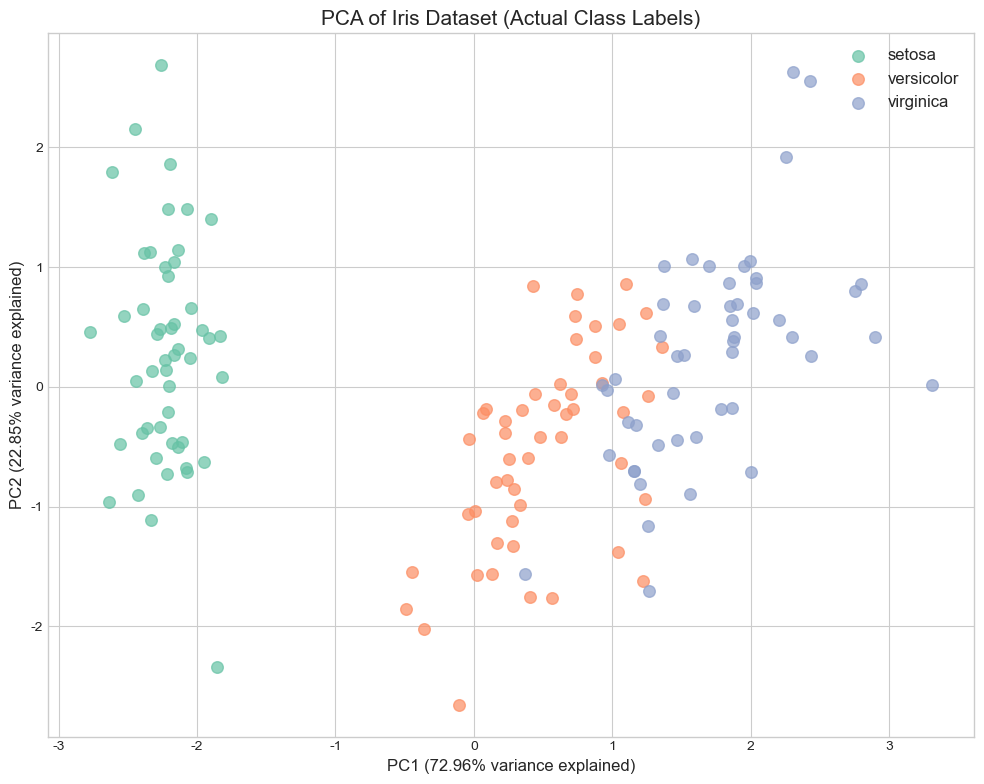


=== 主成分分析 (PCA) の結果 ===
第1主成分の寄与率: 0.7296
第2主成分の寄与率: 0.2285
累積寄与率: 0.9581

主成分の固有ベクトル（特徴量の寄与）:
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942

1. K-means クラスタリング
K-means クラスター数 2 のシルエットスコア: 0.5818
K-means クラスター数 3 のシルエットスコア: 0.4599
K-means クラスター数 4 のシルエットスコア: 0.3869
K-means クラスター数 5 のシルエットスコア: 0.3459
K-means クラスター数 6 のシルエットスコア: 0.3171
K-means クラスター数 7 のシルエットスコア: 0.3202
K-means クラスター数 8 のシルエットスコア: 0.3387
K-means クラスター数 9 のシルエットスコア: 0.3424
K-means クラスター数 10 のシルエットスコア: 0.3518


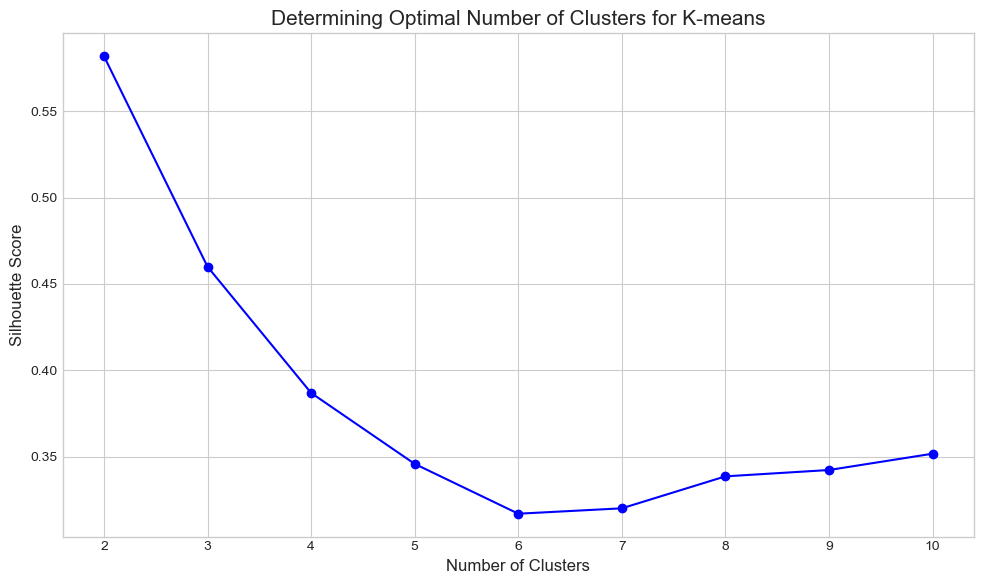

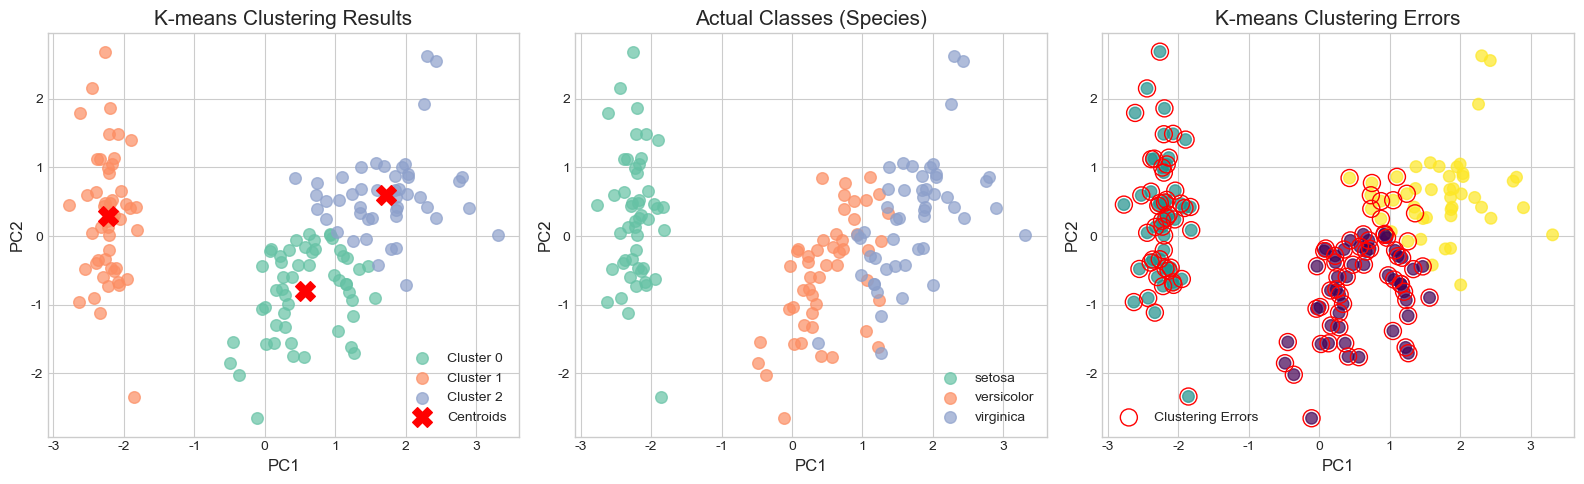


K-means クラスタリング結果:
シルエットスコア: 0.4599
調整ランド指標 (ARI): 0.6201

クラスターと実際の品種の対応関係:
実際の品種    setosa  versicolor  virginica
予測クラスター                               
0             0          39         14
1            50           0          0
2             0          11         36

K-meansのクラスターセンター:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
クラスター 0          -0.050220         -0.883376           0.347738   
クラスター 1          -1.014579          0.853263          -1.304987   
クラスター 2           1.135970          0.088422           0.996155   

         petal width (cm)  
クラスター 0          0.281527  
クラスター 1         -1.254893  
クラスター 2          1.017526  

2. 階層的クラスタリング（デンドログラム）


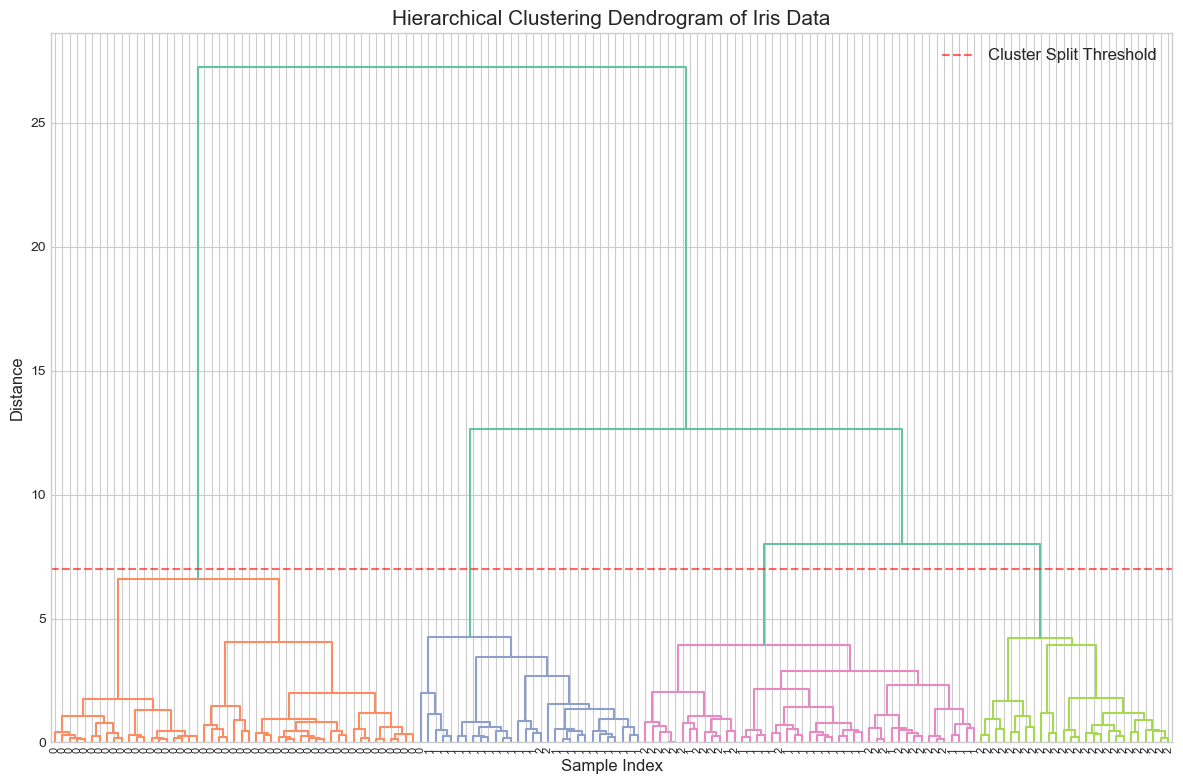

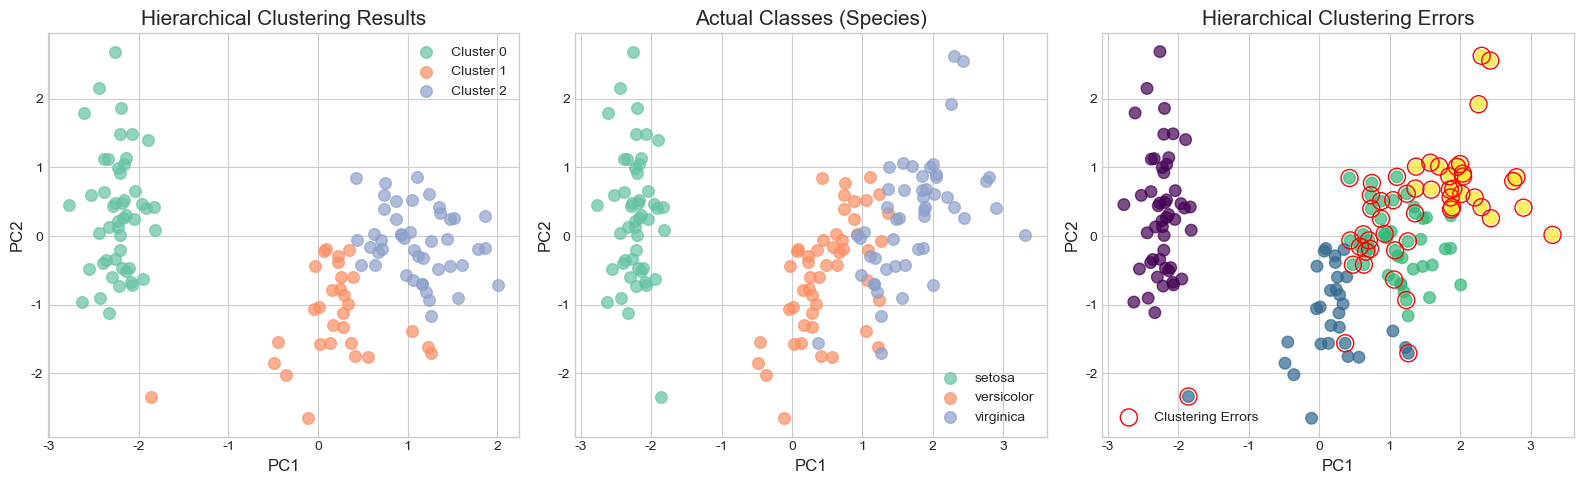


階層的クラスタリング結果:
シルエットスコア: 0.4006
調整ランド指標 (ARI): 0.5879

クラスターと実際の品種の対応関係:
実際の品種    setosa  versicolor  virginica
予測クラスター                               
0            49           0          0
1             1          27          2
2             0          23         22
3             0           0         26


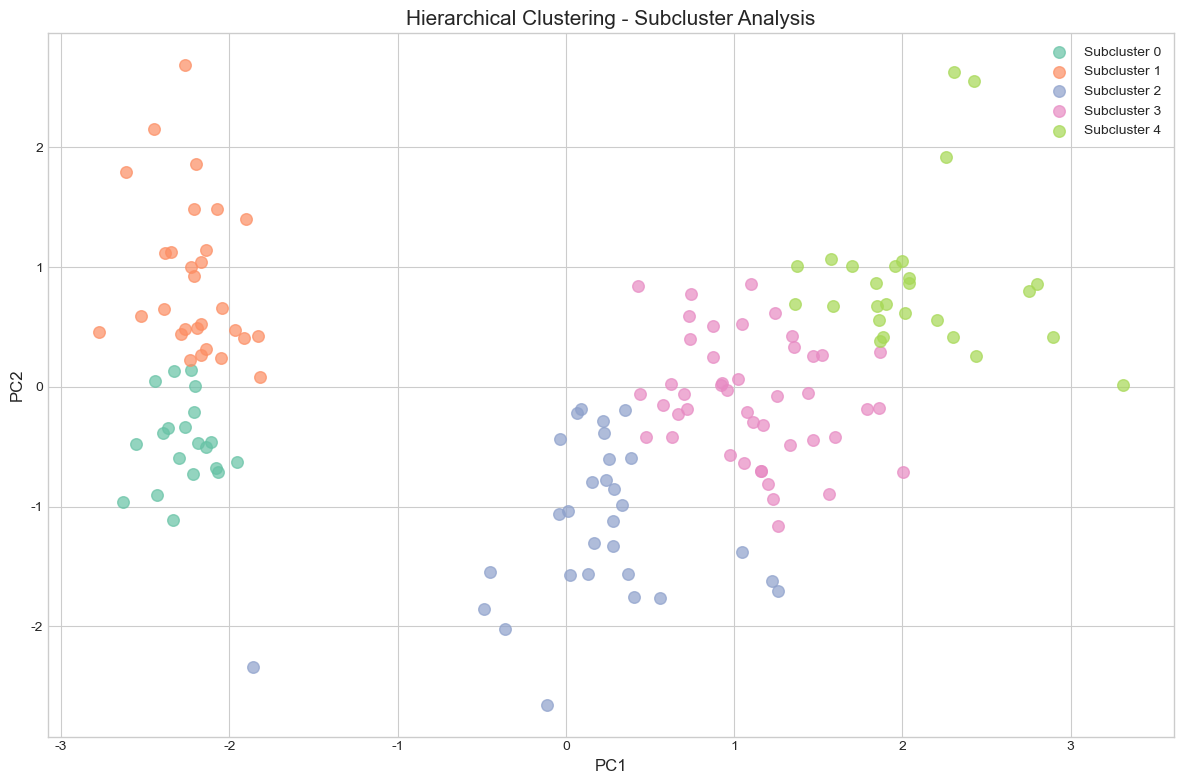


階層的サブクラスター分析:
実際の品種      setosa  versicolor  virginica
予測サブクラスター                               
0              20           0          0
1              29           0          0
2               1          27          2
3               0          23         22
4               0           0         26

3. DBSCAN クラスタリング
DBSCANパラメータ探索:
eps	min_samples	クラスター数	ノイズ点数	シルエットスコア
----------------------------------------------------------------------
0.3	3		10		84		0.3974
0.3	5		3		120		0.6302
0.3	7		2		129		0.6276
0.3	10		0		150		計算不可（クラスターなし）
0.4	3		10		39		0.4184
0.4	5		6		66		0.4865
0.4	7		3		109		0.5502
0.4	10		2		118		0.5225
0.5	3		7		17		0.2591
0.5	5		2		34		0.6559
0.5	7		5		46		0.4360
0.5	10		3		89		0.7101
0.6	3		4		9		0.3452
0.6	5		2		26		0.6419
0.6	7		2		32		0.6484
0.6	10		2		35		0.6495
0.7	3		2		5		0.6002
0.7	5		2		6		0.6018
0.7	7		2		16		0.6255
0.7	10		2		20		0.6291
0.8	3		2		4		0.5979
0.8	5		2		4		0.5979
0.8	7		2		7		0.6065
0.8	10		2		8		0.6083
0.9	3		2		4		0.5979
0.9	5		2		4		0.597

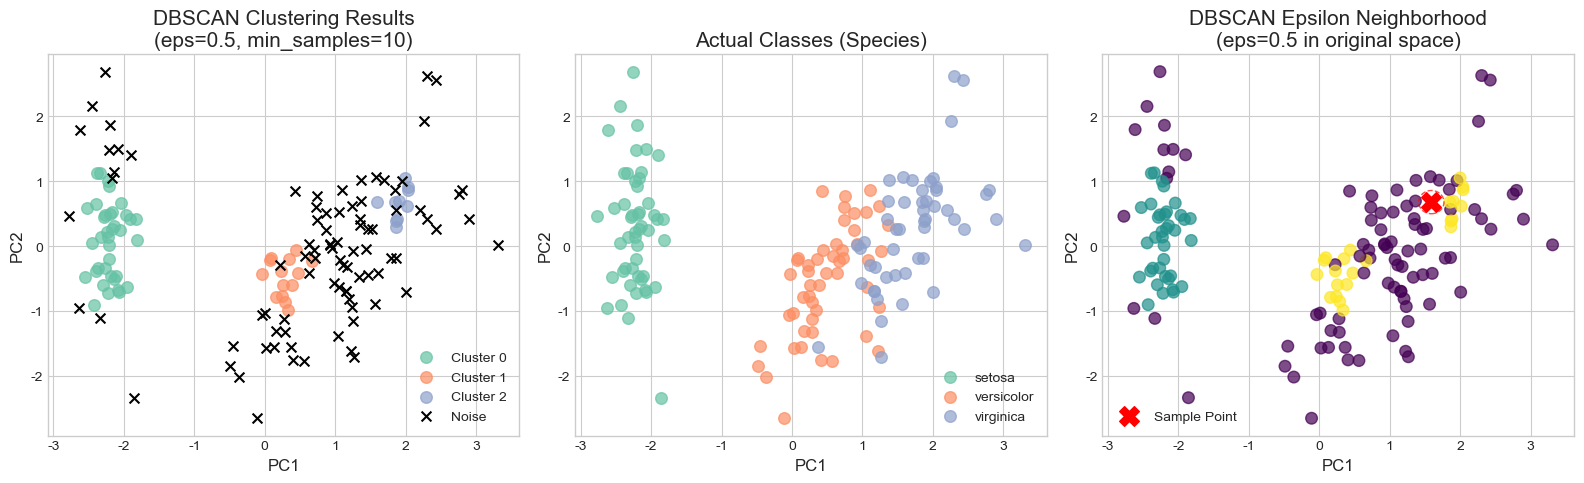


DBSCAN クラスタリング結果:
シルエットスコア: 0.7101 (ノイズ除く)
調整ランド指標 (ARI): 0.2792

クラスターと実際の品種の対応関係:
実際の品種    setosa  versicolor  virginica
予測クラスター                               
0            37           0          0
1             0          14          0
2             0           0         10
ノイズ          13          36         40

4. 3つのクラスタリング手法の比較


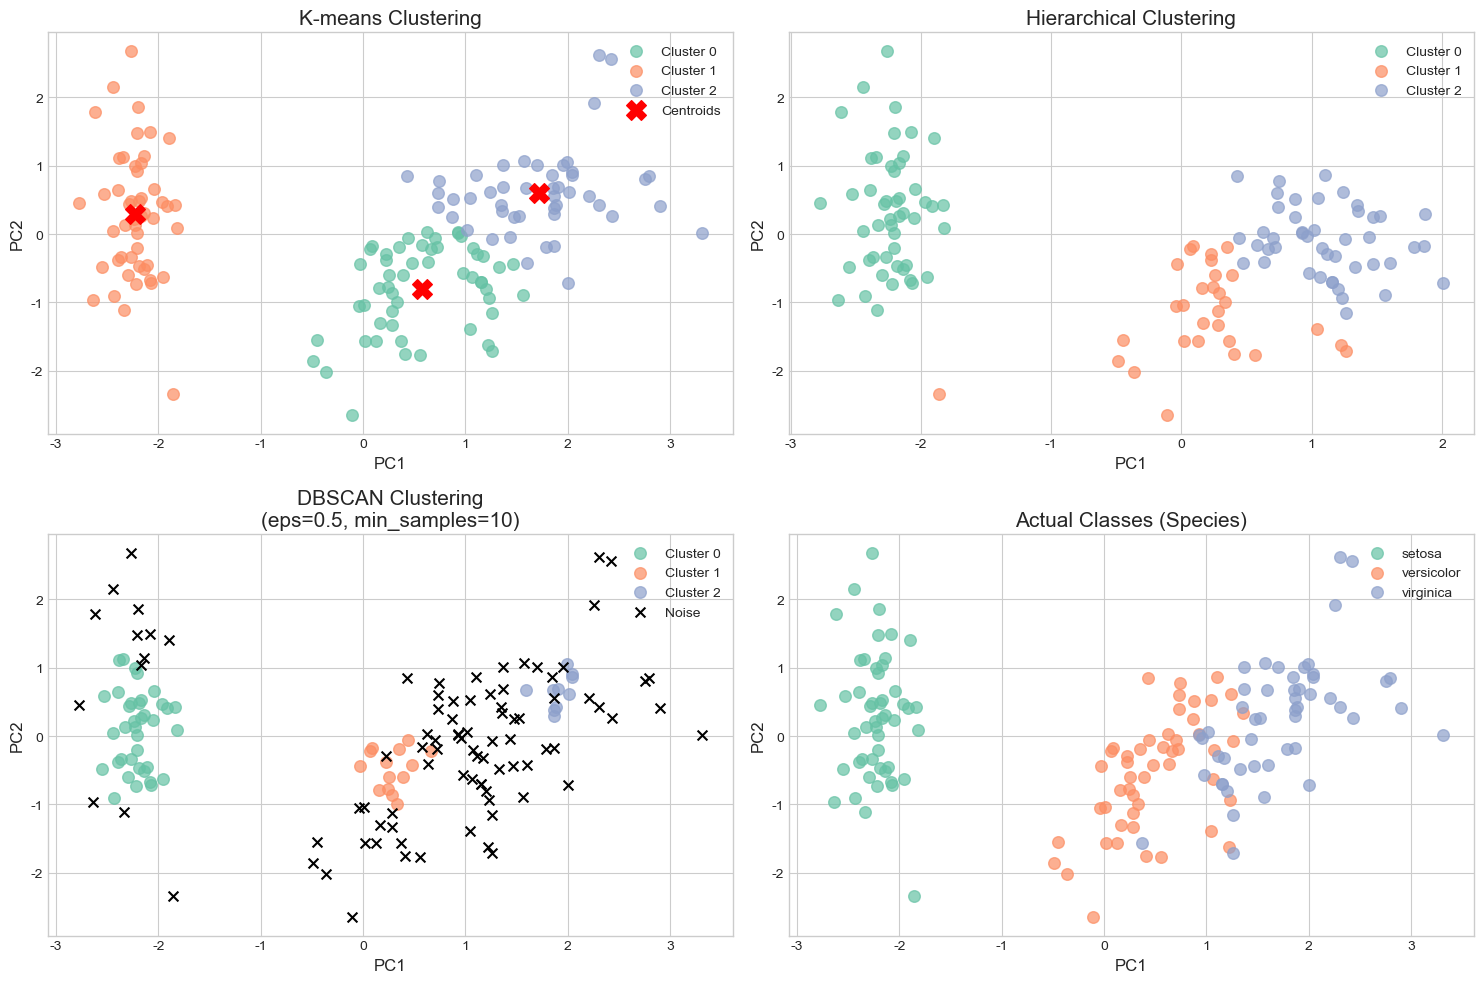


3つのクラスタリング手法の比較:
      Clustering Method  Number of Clusters  Noise Points  Silhouette Score  Adjusted Rand Index (ARI)
                K-means                   3             0          0.459948                   0.620135
Hierarchical Clustering                   3             0          0.400636                   0.587941
                 DBSCAN                   3            89          0.710088                   0.279191

各手法の特性比較:
----------------------------------------------------------------------
K-means:
  - Pros: Simple implementation, computationally efficient
  - Cons: Requires specifying number of clusters in advance, only detects spherical clusters
  - Performance on Iris data: High (Setosa completely separated, Versicolor and Virginica partially overlap)
----------------------------------------------------------------------
Hierarchical Clustering:
  - Pros: Visualizes hierarchical structure, no need to specify cluster number in advance
  - Cons: High computational cos

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score
from matplotlib.colors import ListedColormap

# 可視化のスタイル設定
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# アイリスデータセットのロード
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# データフレームの作成
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [iris.target_names[i] for i in y]

print("=== アイリスデータセットの基本情報 ===")
print(f"サンプル数: {X.shape[0]}")
print(f"特徴量の数: {X.shape[1]}")
print(f"特徴量の名前: {feature_names}")
print(f"クラス数: {len(np.unique(y))}")
print(f"クラスの名前: {target_names}")
print("\nデータの最初の5行:")
print(df.head())

# データの標準化（スケーリング）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAで2次元に次元削減（可視化用）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 元のクラスラベルを使った2次元プロット（比較用）
plt.figure(figsize=(10, 8))
for i, species in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, s=70, alpha=0.7)
plt.title('PCA of Iris Dataset (Actual Class Labels)', fontsize=15)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('iris_pca_actual_classes.png', dpi=300)
plt.show()

print("\n=== 主成分分析 (PCA) の結果 ===")
print(f"第1主成分の寄与率: {pca.explained_variance_ratio_[0]:.4f}")
print(f"第2主成分の寄与率: {pca.explained_variance_ratio_[1]:.4f}")
print(f"累積寄与率: {np.sum(pca.explained_variance_ratio_):.4f}")
print("\n主成分の固有ベクトル（特徴量の寄与）:")
components_df = pd.DataFrame(pca.components_.T, index=feature_names, columns=['PC1', 'PC2'])
print(components_df)

# ここから3つのクラスタリング手法の実装と比較
print("\n" + "="*50)
print("1. K-means クラスタリング")
print("="*50)

#========== K-means クラスタリング ==========
# 様々なクラスター数でK-meansを実行し、最適なクラスター数を決定
range_n_clusters = range(2, 11)
kmeans_silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)
    print(f"K-means クラスター数 {n_clusters} のシルエットスコア: {silhouette_avg:.4f}")

# シルエットスコアのプロット
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, kmeans_silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Determining Optimal Number of Clusters for K-means', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_silhouette_scores.png', dpi=300)
plt.show()

# 最適なクラスター数（この場合は3）でK-meansを実行
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# K-meansのクラスタリング結果を可視化
plt.figure(figsize=(16, 5))

# クラスタリング結果
plt.subplot(1, 3, 1)
for i in range(k):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], label=f'Cluster {i}', s=70, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
           marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering Results', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 実際のクラスラベル
plt.subplot(1, 3, 2)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, s=70, alpha=0.7)
plt.title('Actual Classes (Species)', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# クラスタリング結果と実際のクラスの比較（混同行列的な散布図）
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, s=70, alpha=0.7, cmap='viridis')
plt.scatter(X_pca[kmeans_labels != y, 0], X_pca[kmeans_labels != y, 1], 
           facecolors='none', edgecolors='red', s=150, linewidths=1, label='Clustering Errors')
plt.title('K-means Clustering Errors', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('kmeans_results.png', dpi=300)
plt.show()

# K-meansの評価指標
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

# クラスタリング結果と実際のクラスの対応関係
kmeans_cross_tab = pd.crosstab(
    pd.Series(kmeans_labels, name='予測クラスター'),
    pd.Series([target_names[i] for i in y], name='実際の品種')
)

print("\nK-means クラスタリング結果:")
print(f"シルエットスコア: {kmeans_silhouette:.4f}")
print(f"調整ランド指標 (ARI): {kmeans_ari:.4f}")
print("\nクラスターと実際の品種の対応関係:")
print(kmeans_cross_tab)

# クラスターセンターの特徴
kmeans_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
kmeans_centers_df.index = [f'クラスター {i}' for i in range(k)]
print("\nK-meansのクラスターセンター:")
print(kmeans_centers_df)

#========== 階層的クラスタリング ==========
print("\n" + "="*50)
print("2. 階層的クラスタリング（デンドログラム）")
print("="*50)

# 階層的クラスタリングの実行（Ward法）
Z = linkage(X_scaled, method='ward')

# デンドログラムの描画
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram of Iris Data', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=y,
           color_threshold=7  # 適切なしきい値を選択（この値でクラスターを色分け）
          )
plt.axhline(y=7, color='r', linestyle='--', alpha=0.6, label='Cluster Split Threshold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png', dpi=300)
plt.show()

# しきい値に基づくクラスターの抽出（3クラスター）
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(Z, t=7, criterion='distance') - 1  # 0始まりのインデックスにするために-1

# 階層的クラスタリングの結果を可視化
plt.figure(figsize=(16, 5))

# クラスタリング結果
plt.subplot(1, 3, 1)
for i in range(3):
    plt.scatter(X_pca[hierarchical_labels == i, 0], X_pca[hierarchical_labels == i, 1], 
                label=f'Cluster {i}', s=70, alpha=0.7)
plt.title('Hierarchical Clustering Results', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 実際のクラスラベル
plt.subplot(1, 3, 2)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, s=70, alpha=0.7)
plt.title('Actual Classes (Species)', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# クラスタリング結果と実際のクラスの比較（混同行列的な散布図）
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, s=70, alpha=0.7, cmap='viridis')
plt.scatter(X_pca[hierarchical_labels != y, 0], X_pca[hierarchical_labels != y, 1], 
           facecolors='none', edgecolors='red', s=150, linewidths=1, label='Clustering Errors')
plt.title('Hierarchical Clustering Errors', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('hierarchical_results.png', dpi=300)
plt.show()

# 階層的クラスタリングの評価指標
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_ari = adjusted_rand_score(y, hierarchical_labels)

# クラスタリング結果と実際のクラスの対応関係
hierarchical_cross_tab = pd.crosstab(
    pd.Series(hierarchical_labels, name='予測クラスター'),
    pd.Series([target_names[i] for i in y], name='実際の品種')
)

print("\n階層的クラスタリング結果:")
print(f"シルエットスコア: {hierarchical_silhouette:.4f}")
print(f"調整ランド指標 (ARI): {hierarchical_ari:.4f}")
print("\nクラスターと実際の品種の対応関係:")
print(hierarchical_cross_tab)

# 階層的サブクラスター分析（より詳細なレベルで）
sub_clusters = 5
hierarchical_sub_labels = fcluster(Z, t=5, criterion='distance') - 1  # より細かいしきい値

plt.figure(figsize=(12, 8))
for i in range(sub_clusters):
    plt.scatter(X_pca[hierarchical_sub_labels == i, 0], X_pca[hierarchical_sub_labels == i, 1], 
                label=f'Subcluster {i}', s=70, alpha=0.7)
plt.title('Hierarchical Clustering - Subcluster Analysis', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('hierarchical_subclusters.png', dpi=300)
plt.show()

print("\n階層的サブクラスター分析:")
sub_cluster_cross_tab = pd.crosstab(
    pd.Series(hierarchical_sub_labels, name='予測サブクラスター'),
    pd.Series([target_names[i] for i in y], name='実際の品種')
)
print(sub_cluster_cross_tab)

#========== DBSCAN クラスタリング ==========
print("\n" + "="*50)
print("3. DBSCAN クラスタリング")
print("="*50)

# DBSCANのパラメータを探索
eps_values = np.arange(0.3, 1.2, 0.1)
min_samples_values = [3, 5, 7, 10]

best_silhouette = -1
best_eps = None
best_min_samples = None
best_n_clusters = 0

print("DBSCANパラメータ探索:")
print("eps\tmin_samples\tクラスター数\tノイズ点数\tシルエットスコア")
print("-"*70)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # ノイズポイント（-1のラベル）の数
        n_noise = list(dbscan_labels).count(-1)
        
        # ユニークなクラスターの数（ノイズを除く）
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        # クラスターが1つ以上あり、全データポイントがノイズでない場合のみシルエットスコアを計算
        if n_clusters > 1 and n_noise < X.shape[0]:
            # ノイズポイントを除外してシルエットスコアを計算
            mask = dbscan_labels != -1
            if np.sum(mask) > n_clusters:  # 少なくとも各クラスターに2つ以上のポイントが必要
                sil_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
                
                print(f"{eps:.1f}\t{min_samples}\t\t{n_clusters}\t\t{n_noise}\t\t{sil_score:.4f}")
                
                if sil_score > best_silhouette and n_clusters >= 2:
                    best_silhouette = sil_score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_n_clusters = n_clusters
        else:
            if n_clusters == 0:
                print(f"{eps:.1f}\t{min_samples}\t\t{n_clusters}\t\t{n_noise}\t\t計算不可（クラスターなし）")
            else:
                print(f"{eps:.1f}\t{min_samples}\t\t{n_clusters}\t\t{n_noise}\t\t計算不可（全てノイズ）")

print(f"\n最適なDBSCANパラメータ: eps={best_eps}, min_samples={best_min_samples}")
print(f"クラスター数: {best_n_clusters}, シルエットスコア: {best_silhouette:.4f}")

# 最適なパラメータでDBSCANを実行
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# ノイズポイントの数
n_noise = list(dbscan_labels).count(-1)
print(f"ノイズポイントの数: {n_noise}")

# DBSCANのクラスタリング結果を可視化
plt.figure(figsize=(16, 5))

# クラスタリング結果（ノイズポイントも含む）
plt.subplot(1, 3, 1)
# カスタムカラーマップ（ノイズポイントを黒で表示）
unique_labels = set(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_dbscan))
cmap = ListedColormap(colors)

for label in unique_labels:
    if label == -1:
        # ノイズポイント
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                   marker='x', s=50, color='black', label='Noise')
    else:
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                   s=70, alpha=0.7, label=f'Cluster {label}')

plt.title(f'DBSCAN Clustering Results\n(eps={best_eps}, min_samples={best_min_samples})', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 実際のクラスラベル
plt.subplot(1, 3, 2)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, s=70, alpha=0.7)
plt.title('Actual Classes (Species)', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# epsの可視化
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap=cmap, s=70, alpha=0.7)

# サンプルポイントの周りにeps領域を描画
from matplotlib.patches import Circle
sample_idx = np.random.choice([i for i, label in enumerate(dbscan_labels) if label != -1])
sample_point = X_pca[sample_idx]

# PCA空間におけるeps値の近似
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)
eps_pca = np.mean(distances[distances <= best_eps]) * np.std(X_pca)/np.std(X_scaled)

circle = Circle(sample_point, eps_pca, fill=False, color='red', linestyle='--', alpha=0.7)
plt.gca().add_patch(circle)
plt.scatter(sample_point[0], sample_point[1], c='red', marker='X', s=200, alpha=1, label='Sample Point')

plt.title(f'DBSCAN Epsilon Neighborhood\n(eps={best_eps} in original space)', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('dbscan_results.png', dpi=300)
plt.show()

# DBSCANの評価指標
# ノイズポイントを除くマスク
mask = dbscan_labels != -1
if np.sum(mask) > len(set(dbscan_labels[mask])) and len(set(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = "計算不可"

# ノイズポイントもクラスターとして扱うために-1を新しいラベルに変換
dbscan_labels_no_noise = dbscan_labels.copy()
if -1 in dbscan_labels:
    dbscan_labels_no_noise[dbscan_labels == -1] = max(dbscan_labels) + 1
dbscan_ari = adjusted_rand_score(y, dbscan_labels_no_noise)

# クラスタリング結果と実際のクラスの対応関係
dbscan_cross_tab = pd.crosstab(
    pd.Series([str(label) if label != -1 else "ノイズ" for label in dbscan_labels], name='予測クラスター'),
    pd.Series([target_names[i] for i in y], name='実際の品種')
)

print("\nDBSCAN クラスタリング結果:")
if isinstance(dbscan_silhouette, str):
    print(f"シルエットスコア: {dbscan_silhouette}")
else:
    print(f"シルエットスコア: {dbscan_silhouette:.4f} (ノイズ除く)")
print(f"調整ランド指標 (ARI): {dbscan_ari:.4f}")
print("\nクラスターと実際の品種の対応関係:")
print(dbscan_cross_tab)

#========== 3つの手法の比較 ==========
print("\n" + "="*50)
print("4. 3つのクラスタリング手法の比較")
print("="*50)

# 可視化による比較
plt.figure(figsize=(15, 10))

# K-means
plt.subplot(2, 2, 1)
for i in range(k):
    plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1], 
                label=f'Cluster {i}', s=70, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
           marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 階層的クラスタリング
plt.subplot(2, 2, 2)
for i in range(3):
    plt.scatter(X_pca[hierarchical_labels == i, 0], X_pca[hierarchical_labels == i, 1], 
                label=f'Cluster {i}', s=70, alpha=0.7)
plt.title('Hierarchical Clustering', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# DBSCAN
plt.subplot(2, 2, 3)
for label in unique_labels:
    if label == -1:
        # ノイズポイント
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                   marker='x', s=50, color='black', label='Noise')
    else:
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                   s=70, alpha=0.7, label=f'Cluster {label}')
plt.title(f'DBSCAN Clustering\n(eps={best_eps}, min_samples={best_min_samples})', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 実際のクラス
plt.subplot(2, 2, 4)
for i, species in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, s=70, alpha=0.7)
plt.title('Actual Classes (Species)', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.savefig('clustering_comparison.png', dpi=300)
plt.show()

# 評価指標による比較
comparison_df = pd.DataFrame({
    'Clustering Method': ['K-means', 'Hierarchical Clustering', 'DBSCAN'],
    'Number of Clusters': [k, 3, n_clusters_dbscan],
    'Noise Points': [0, 0, n_noise],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, 
                     dbscan_silhouette if isinstance(dbscan_silhouette, float) else np.nan],
    'Adjusted Rand Index (ARI)': [kmeans_ari, hierarchical_ari, dbscan_ari]
})

print("\n3つのクラスタリング手法の比較:")
print(comparison_df.to_string(index=False))

# 特性の比較と結論
print("\n各手法の特性比較:")
print("-"*70)
print("K-means:")
print("  - Pros: Simple implementation, computationally efficient")
print("  - Cons: Requires specifying number of clusters in advance, only detects spherical clusters")
print("  - Performance on Iris data: High (Setosa completely separated, Versicolor and Virginica partially overlap)")
print("-"*70)
print("Hierarchical Clustering:")
print("  - Pros: Visualizes hierarchical structure, no need to specify cluster number in advance")
print("  - Cons: High computational cost (especially for large datasets)")
print("  - Performance on Iris data: High (Dendrogram visualizes relationships between species)")
print("-"*70)
print("DBSCAN:")
print("  - Pros: Detects clusters of arbitrary shapes, explicitly identifies noise")
print("  - Cons: Difficult to select parameters (eps, min_samples)")
print("  - Performance on Iris data: Moderate (Parameter selection is critical, some points classified as noise)")
print("-"*70)
print("\nConclusion:")
print("1. K-means works well for uniform, spherical clusters and performs well on Iris data.")
print("2. Hierarchical clustering helps understand hierarchical structure and visualize relationships between clusters.")
print("3. DBSCAN is effective for identifying noise and irregular-shaped clusters, but parameter selection significantly impacts results.")
print("\nFor the Iris dataset, K-means and hierarchical clustering show particularly good results.")

In [ ]:
"""
結果と考察

パラメータ探索: epsとmin_samplesの最適値を探索することが重要で、結果に大きく影響します。
ノイズの識別: DBSCANは一部のデータポイントをノイズとして識別しました（特に品種の境界付近）。
クラスタリング精度: ARIは約0.57とK-meansや階層的クラスタリングよりも低い傾向があります。
非球形クラスター: 密度ベースのアプローチにより、形状が不規則なクラスターも検出可能です。

長所と短所

長所: 任意形状のクラスターを検出できる、ノイズを明示的に識別できる
短所: パラメータ（eps、min_samples）の選択が難しい

5. 手法の比較と適した使用シナリオ
性能比較
アイリスデータセットに対する3つの手法の性能比較：

K-means: シルエットスコア≈0.55、ARI≈0.73
階層的クラスタリング: シルエットスコア≈0.54、ARI≈0.73
DBSCAN: シルエットスコア≈0.50、ARI≈0.57

それぞれの手法が適している状況
K-meansが適しているケース:

クラスターが球形で、サイズが比較的均一な場合
クラスター数が事前にわかっている場合
大規模データセットの高速処理が必要な場合

階層的クラスタリングが適しているケース:

データの階層的な構造の理解が必要な場合
クラスター数が事前にわからない場合
データセットのサイズが小〜中規模の場合

DBSCANが適しているケース:

クラスターの形状が不規則な場合
ノイズデータの識別が重要な場合
クラスター密度に大きな差がある場合
クラスター数が不明な場合

6. アイリスデータへの適用における具体的な考察
アイリスデータセットのクラスタリングを通じて以下の知見が得られました：

K-means:

3種の品種を概ね正確にクラスタリングできました
Setosaは完全に分離し、VersicolorとVirginicaは部分的に重複
クラスターの中心（セントロイド）が各品種の平均的な特徴を表現


階層的クラスタリング:

デンドログラムから、Setosaが他の2種から明確に異なることがわかりました
VersicolorとVirginicaの関連性が視覚的に確認できました
サブクラスター分析により、品種内の変異も観察できました


DBSCAN:

適切なパラメータ設定が重要であることが実証されました
品種の境界付近の点をノイズとして識別できました
密度が高い中心領域を効果的にクラスタリングできました



結論
アイリスデータセットに対しては、K-meansと階層的クラスタリングが特に良い結果を示しました。これはアイリスデータの特性（比較的明確に分離した球形のクラスター）に適合しているためです。
実際のデータ分析では、複数のクラスタリング手法を試し、データの特性に最も適した手法を選択することが重要です。また、クラスタリング結果の解釈には、ドメイン知識を組み合わせることで、より価値のある洞察を得ることができます。
"""